                                             __Bussiness Case__
                                                                                                                           
Bank GoodCredit wants to predict cred score for current credit card customers. The cred score will denote a customer’s credit worthiness and help the bank in reducing credit default risk.

                                          ____DataSets Attributes____
                                               
Target variable → Bad_label
* 0 – Customer has Good credit history
* 1 – Customer has Bad credit history (falls into 30 DPD + bucket)

This data has three tables and each tables has there own columns :-
* __Cust_Account__   
* __Cust_Demographics__ 
* __Cust_Enquiry__  

                                               

                                                __Preface__
                                              
In bank Goodcredit, banks consider and evaluate every loan application based on merits. They check the creditworthiness of every individual or entity to determine the level of risk that they subject themself by lending to an entity or individual.Clients with a high level of risk are less desirable since they present with a high likelihood of defaulting on their loan obligations. Low-risk clients are more likely to get their loan applications approved since the lender considers them creditworthy.                                              

                                               __Domain Analysis__
                                         
Bank credit analysis involves verifying and determining the creditworthiness of a potential client by looking at their financial state, credit reports, and business cash flows.The goal of credit analysis is to determine the level of default risk that a client presents to the company and the losses that the bank will suffer if the client defaults.The risk level that a client presents determines whether the bank will approve or reject the loan application, and if approved, the amount to be awarded.some of the major table this data has and every tables has there own important columns which are Customers Account, Customers Demographics and Customers Enquiry.                                         

* Cust_Account :- This table contains customer’s historical accounts data and payments history.
* Cust_Demographics :- This table contains customer’s historical enquiry data such as enquiry amount and enquiry purpose.
* Cust_Enquiry :- Current customer applications with demographic data
* __Note__ that demographics features are renamed as features and obscured in accordance with privacy policies.

* I will explain every necesseary columns when i'll do __Data Cleaning__.


                                              __Data Set Fields__
                                              
For getting a Dataset we have to install pymysql and mysql connector. and the help of mysql i'm going to load dataset and convert into csv file then i'm going to work on this project.                                              

                                            __python implimentation__

In [1]:
import os               # Handling the Current Working Directory
import mysql.connector  #  mysql-connector for making connections to database server
import pandas as pd     # import pandas for analyzing, cleaning, exploring, and manipulating data
import numpy as np      # import numpy for working with mathematices part/numerical data
## visualisation
import matplotlib.pyplot as plt
import seaborn as sns
# for ignoring warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
## making connections to database server
connection=mysql.connector.connect(host = "18.136.157.135",
                                  user='dm_team1',
                                  password='DM!$&279@20!')

In [3]:
## Check the number of databases available on the server
cursor=connection.cursor()
cursor.execute('show databases')
for i in cursor:
    print(i)

('information_schema',)
('project_banking',)


In [4]:
## connecting the database
connection=mysql.connector.connect(host='18.136.157.135',
                                  user='dm_team1',
                                  password='DM!$&279@20!',
                                  database='project_banking')

In [5]:
# getting all tables of bank goodcredit
db_tables=pd.read_sql_query('show tables',connection)
print(db_tables)

  Tables_in_project_banking
0              Cust_Account
1         Cust_Demographics
2              Cust_Enquiry


In [6]:
# put Cust_Account tables in variable
Cust_Account = pd.read_sql_query("Select * from Cust_Account",connection)

In [7]:
# put Cust_Demographics tables in variable
Cust_Demographics = pd.read_sql_query("Select * from Cust_Demographics",connection)

In [8]:
# put Cust_Enquiry tables in variable
# Don't need Customers enquriy for traing model so we are skip the tables
# we skip this tables because customers enquiry tables nevers contribute for checking credit score 
Cust_Enquiry = pd.read_sql_query("Select * from Cust_Enquiry",connection)

In [9]:
# run a code for showing all columns
pd.set_option('display.max_columns',None)
pd.reset_option('display.max_rows',None)

In [10]:
# This table contains customer’s historical accounts data and payments history.
Cust_Account

,dt_opened,customer_no,upload_dt,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,cur_balance_amt,amt_past_due,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,creditlimit,cashlimit,rateofinterest,paymentfrequency,actualpaymentamount
0,10-Nov-15,12265,20-Oct-15,6,1,09-Jun-13,30-Jun-14,05-Jul-14,30-Sep-15,20900,0,,"""""""STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...",,01-Sep-15,01-Jul-14,,,,,
1,10-Nov-15,12265,20-Oct-15,10,1,25-May-12,06-Sep-15,,03-Oct-15,16201,10390,,"""""""0000000000000000000000000000000000000000000...","""""""000000000000000000000000000XXX0000000000000...",01-Oct-15,01-Nov-12,14000,1400,,3,5603
2,10-Nov-15,12265,20-Oct-15,10,1,22-Mar-12,31-Aug-15,,30-Sep-15,41028,34420,,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Sep-15,01-Oct-12,,,,,
3,20-Jul-15,15606,09-Jul-15,10,1,13-Jan-06,,26-Jul-07,31-Jan-09,93473,0,,"""""""1200900600600600300000000000000000000000000...",,01-Jul-07,01-Feb-06,,,,,
4,20-Jul-15,15606,09-Jul-15,6,1,18-Jan-15,05-May-15,,31-May-15,20250,13500,,"""""""000000000000000""""""",,01-May-15,01-Jan-15,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186324,11-Jun-15,1611,25-May-15,10,1,02-May-07,21-Apr-15,,30-Apr-15,24228,24228,,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Apr-15,01-May-12,,,,,
186325,11-Jun-15,1611,25-May-15,10,1,11-Apr-07,22-Jun-09,02-Apr-10,30-Apr-15,19584,0,,"""""""000179146119089058029000XXX""""""",,01-Apr-10,01-Aug-09,,,,3,
186326,11-Jun-15,1611,25-May-15,10,1,20-Nov-06,,12-Apr-12,31-Dec-13,50844,0,,"""""""000XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...",,01-Apr-12,01-Dec-10,,,,3,
186327,11-Jun-15,1611,25-May-15,10,1,17-Oct-06,,07-Mar-12,15-Apr-15,35587,0,,"""""""000010000000000000000000000000000XXXXXXXXXX...","""""""XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...",01-Mar-12,01-Apr-09,15000,6000,,3,


In [11]:
#  This table contains customer’s historical enquiry data such as enquiry amount and enquiry purpose.
Cust_Demographics

,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
0,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650,2,Card Setup,14,500000,,,,Y,IS1,,0,159,4284,4284,,1,ADFPNXXXXX,03-Sep-65,98332XXXXX,N,@REDIFFMAIL.COM,1,2,,Mumbai / Navi Mumbai / Thane,400610,1965,0,Self,Y,2,90000,,,,0,0,0,0,Mumbai,400059,@CODOGNOTTO.NET,PAN Card,ADFPNXXXXX,The Ratnakar Bank Ltd.,,Y,State Bank of India,0,01-Jun-13,17-Jun-16,1,21,,Y,Y,N,,Y,1965-0,21,15,400610,0,2,90000,Nov-00,21,R,,,0000-00-00,0,98332XXXXX,1,N,0
1,21-Apr-15,2,21-Apr-15,Insignia,21-Apr-15,760,1,Card Setup,14,1200000,,,,Y,IS1,,0,91,B001,4077,,1,AJWPRXXXXX,14-Jul-62,99455XXXXX,N,@GMAIL.COM,1,2,,Bengaluru,560042,1969,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,,PAN Card,AJWPRXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,17,,Y,Y,N,,Y,1969-0,17,12,560042,0,2,1,Nov-00,17,R,,,0000-00-00,0,99455XXXXX,1,N,0
2,22-Apr-15,3,21-Apr-15,Insignia,21-Apr-15,774,1,Card Setup,14,700000,,,,Y,IS1,,0,91,B001,4077,,2,AFAPNXXXXX,10-Apr-66,98456XXXXX,N,@SHOBANARAYAN.COM,1,0,,Bengaluru,560042,1966,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,,PAN Card,AFAPNXXXXX,,,N,,0,,17-Jun-16,3,17,,N,Y,N,,Y,1966-0,17,12,560042,0,2,1,Nov-00,17,R,,,0000-00-00,0,98456XXXXX,1,N,0
3,25-Apr-15,4,15-Apr-15,Insignia,20-Apr-15,770,1,Card Setup,14,500000,,,,Y,IS1,,0,157,5107,5107,,1,AAAPDXXXXX,16-Apr-64,98220XXXXX,N,@VSNL.COM,1,3,,Pune,411001,1988,0,Self,Y,2,100000,,,,0,0,0,0,Pune,411026,@ALBAJ.COM,PAN Card,AAAPDXXXXX,The Ratnakar Bank Ltd.,,Y,HDFC Bank,0,,17-Jun-16,1,21,,Y,Y,N,,Y,1988-0,21,16,411001,0,2,100000,Nov-00,21,R,,,6/15/65,1,98220XXXXX,1,N,0
4,06-May-15,5,30-Apr-15,Insignia,,,3,Card Setup,14,500000,,,,Y,IS1,,0,100,D016,4564,,1,ABEPSXXXXX,03-Jan-54,98111XXXXX,N,@REDIFFMAIL.COM,1,3,,Gurgaon,122009,1995,0,Self,Y,2,300000,,,,0,0,0,0,Gurgaon,122009,,PAN Card,ABEPSXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,13,,Y,Y,N,,Y,1995-0,13,3,122009,0,2,300000,Nov-00,13,R,,,0000-00-00,0,98111XXXXX,1,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23891,31-Dec-15,23892,10-Dec-15,Platinum Deligh,10-Dec-15,704,1,Card Setup,14,119000,,,,Y,PD1,PD3,12,SA05,MA01,,,1,CUQPSXXXXX,12-Oct-88,98715XXXXX,N,@YAHOO.COM,2,0,Graduate,New Delhi,110045,1988,10,Paren,Y,1,33000,Private Ltd. Co.,Others,SERVICE ASSOCIATE,2015,6,0,6,Gurgaon,122001,,PAN Card,CUQPSXXXXX,,,Y,State Bank of India,99000,01-Jan-15,17-Jun-16,1,10,Y,N,Y,N,,Y,1988-10,10,157,110045,0,1,33000,0-0,13,R,Y,,0000-00-00,0,XXXXX,1,N,0
23892,17-Dec-15,23893,16-Nov-15,Platinum Deligh,,,2,Card Setup,14,35000,,,,Y,PD1,PD3,12,SA03,AS33,,,1,DTPPSXXXXX,01-Feb-87,99101XXXXX,N,@GMAIL.COM,2,0,Graduate,New Delhi,110037,2014,12,Rente,N,1,1,Private Ltd. Co.,Others,ENGINEER,2012,12,3,0,New Delhi,110037,@GMAIL.COM,PAN Card,DTPPSXXXXX,,,N,,0,,17-Jun-16,1,10,N,N,Y,N,,Y,2014-12,33,102,282001,1,1,1,0-0,10,O,Y,,0000-00-00,0,99101XXXXX,1,N,0
23893,04-Nov-15,23894,24-Sep-15,Platinum Maxima,24-Sep-15,748,3,Card 

In [12]:
# Current customer applications with demographic data
Cust_Enquiry

,dt_opened,customer_no,upload_dt,enquiry_dt,enq_purpose,enq_amt
0,18-Apr-15,1,21-Apr-15,19-Dec-14,2,3500000
1,18-Apr-15,1,21-Apr-15,05-Mar-14,5,500000
2,18-Apr-15,1,21-Apr-15,05-Mar-14,0,50000
3,18-Apr-15,1,21-Apr-15,22-Feb-14,10,50000
4,18-Apr-15,1,21-Apr-15,11-Jun-13,10,1000
...,...,...,...,...,...,...
413183,04-Dec-15,23896,09-Nov-15,22-Oct-11,5,200000
413184,04-Dec-15,23896,09-Nov-15,06-Jan-11,10,50000
413185,04-Dec-15,23896,09-Nov-15,01-Apr-10,10,50000
413186,04-Dec-15,23896,09-Nov-15,21-Feb-10,1,330000


In [13]:
# here i'm going to merge the all tables in one variables and making one dataset of two tables by using inner join
data = pd.merge(Cust_Account,Cust_Demographics,on ="customer_no",how="inner")

In [14]:
# that's we got dataset after mergeing.....
data

,dt_opened_x,customer_no,upload_dt,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,cur_balance_amt,amt_past_due,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,creditlimit,cashlimit,rateofinterest,paymentfrequency,actualpaymentamount,dt_opened_y,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
0,10-Nov-15,12265,20-Oct-15,6,1,09-Jun-13,30-Jun-14,05-Jul-14,30-Sep-15,20900,0,,"""""""STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...",,01-Sep-15,01-Jul-14,,,,,,10-Nov-15,15-Oct-15,Platinum Maxima,15-Oct-15,683,3,Card Setup,14,56000,,,,Y,PM1,,,SA05,MA01,,,1,ASWPKXXXXX,15-Jun-84,88009XXXXX,N,@GMAIL.COM,1,0,MBA/MMS,New Delhi,110059,2006,0,Paren,Y,1,35000,Private Ltd. Co.,Others,SR EXE,2009,1,4,0,Gurgaon,122001,,PAN Card,ASWPKXXXXX,,,N,,0,,17-Jun-16,1,10,,N,Y,N,,Y,2006-0,10,157,110059,0,1,35000,0-0,13,R,,,0000-00-00,0,88009XXXXX,1,N,1
1,10-Nov-15,12265,20-Oct-15,10,1,25-May-12,06-Sep-15,,03-Oct-15,16201,10390,,"""""""0000000000000000000000000000000000000000000...","""""""000000000000000000000000000XXX0000000000000...",01-Oct-15,01-Nov-12,14000,1400,,3,5603,10-Nov-15,15-Oct-15,Platinum Maxima,15-Oct-15,683,3,Card Setup,14,56000,,,,Y,PM1,,,SA05,MA01,,,1,ASWPKXXXXX,15-Jun-84,88009XXXXX,N,@GMAIL.COM,1,0,MBA/MMS,New Delhi,110059,2006,0,Paren,Y,1,35000,Private Ltd. Co.,Others,SR EXE,2009,1,4,0,Gurgaon,122001,,PAN Card,ASWPKXXXXX,,,N,,0,,17-Jun-16,1,10,,N,Y,N,,Y,2006-0,10,157,110059,0,1,35000,0-0,13,R,,,0000-00-00,0,88009XXXXX,1,N,1
2,10-Nov-15,12265,20-Oct-15,10,1,22-Mar-12,31-Aug-15,,30-Sep-15,41028,34420,,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Sep-15,01-Oct-12,,,,,,10-Nov-15,15-Oct-15,Platinum Maxima,15-Oct-15,683,3,Card Setup,14,56000,,,,Y,PM1,,,SA05,MA01,,,1,ASWPKXXXXX,15-Jun-84,88009XXXXX,N,@GMAIL.COM,1,0,MBA/MMS,New Delhi,110059,2006,0,Paren,Y,1,35000,Private Ltd. Co.,Others,SR EXE,2009,1,4,0,Gurgaon,122001,,PAN Card,ASWPKXXXXX,,,N,,0,,17-Jun-16,1,10,,N,Y,N,,Y,2006-0,10,157,110059,0,1,35000,0-0,13,R,,,0000-00-00,0,88009XXXXX,1,N,1
3,20-Jul-15,15606,09-Jul-15,10,1,13-Jan-06,,26-Jul-07,31-Jan-09,93473,0,,"""""""1200900600600600300000000000000000000000000...",,01-Jul-07,01-Feb-06,,,,,,20-Jul-15,06-Jul-15,Platinum Deligh,06-Jul-15,687,3,Card Setup,14,125000,,,,Y,PD1,PD3,12,SA35,S001,,,1,AHRPMXXXXX,20-Jun-80,88009XXXXX,N,@YAHOO.COM,1,2,Post-Graduate,Faridabad,121003,2009,0,Self,Y,1,100000,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,2013,1,2,0,Faridabad,121003,@SUPERFASHIONINDIA.COM,PAN Card,AHRPMXXXXX,Indian Bank,,N,,0,,17-Jun-16,1,13,,N,Y,N,,Y,2009-0,13,39,121003,0,1,100000,0-0,13,R,,,0000-00-00,0,XXXXX,1,N,1
4,20-Jul-15,15606,09-Jul-15,6,1,18-Jan-15,05-May-15,,31-May-15,20250,13500,,"""""""000000000000000""""""",,01-May-15,01-Jan-15,,,,,,20-Jul-15,06-Jul-15,Platinum Deligh,06-Jul-15,687,3,Card Setup,14,125000,,,,Y,PD1,PD3,12,SA35,S001,,,1,AHRPMXXXXX,20-Jun-80,88009XXXXX,N,@YAHOO.COM,1,2,Post-Graduate,Faridabad,121003,2009,0,Self,Y,1,100000,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,2013,1,2,0,Faridabad,121003,@SUPERFASHIONINDIA.COM,PAN Card,AHRPMXXXXX,Indi

In [15]:
# To save mergeing dataset
data.to_csv("Bank_GoodCredits",index=False)

In [16]:
#data is in csv file so we have to call pd.read_csv from pandas
data = pd.read_csv("Bank_GoodCredits")# loading a dataset

In [17]:
data

,dt_opened_x,customer_no,upload_dt,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,cur_balance_amt,amt_past_due,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,creditlimit,cashlimit,rateofinterest,paymentfrequency,actualpaymentamount,dt_opened_y,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
0,10-Nov-15,12265,20-Oct-15,6,1,09-Jun-13,30-Jun-14,05-Jul-14,30-Sep-15,20900.0,0,NaN,"""""""STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...",NaN,01-Sep-15,01-Jul-14,NaN,NaN,NaN,NaN,NaN,10-Nov-15,15-Oct-15,Platinum Maxima,15-Oct-15,683.0,3.0,Card Setup,14.0,56000.0,NaN,NaN,NaN,Y,PM1,NaN,NaN,SA05,MA01,NaN,NaN,1.0,ASWPKXXXXX,15-Jun-84,88009XXXXX,N,@GMAIL.COM,1.0,0.0,MBA/MMS,New Delhi,110059.0,2006.0,0.0,Paren,Y,1.0,35000.0,Private Ltd. Co.,Others,SR EXE,2009.0,1.0,4.0,0.0,Gurgaon,122001.0,NaN,PAN Card,ASWPKXXXXX,NaN,NaN,N,NaN,0.0,NaN,17-Jun-16,1.0,10.0,NaN,N,Y,N,NaN,Y,2006-0,10.0,157.0,110059.0,0.0,1.0,35000.0,0-0,13.0,R,NaN,NaN,0000-00-00,0.0,88009XXXXX,1.0,N,1
1,10-Nov-15,12265,20-Oct-15,10,1,25-May-12,06-Sep-15,NaN,03-Oct-15,16201.0,10390,NaN,"""""""0000000000000000000000000000000000000000000...","""""""000000000000000000000000000XXX0000000000000...",01-Oct-15,01-Nov-12,14000.0,1400.0,NaN,3.0,5603.0,10-Nov-15,15-Oct-15,Platinum Maxima,15-Oct-15,683.0,3.0,Card Setup,14.0,56000.0,NaN,NaN,NaN,Y,PM1,NaN,NaN,SA05,MA01,NaN,NaN,1.0,ASWPKXXXXX,15-Jun-84,88009XXXXX,N,@GMAIL.COM,1.0,0.0,MBA/MMS,New Delhi,110059.0,2006.0,0.0,Paren,Y,1.0,35000.0,Private Ltd. Co.,Others,SR EXE,2009.0,1.0,4.0,0.0,Gurgaon,122001.0,NaN,PAN Card,ASWPKXXXXX,NaN,NaN,N,NaN,0.0,NaN,17-Jun-16,1.0,10.0,NaN,N,Y,N,NaN,Y,2006-0,10.0,157.0,110059.0,0.0,1.0,35000.0,0-0,13.0,R,NaN,NaN,0000-00-00,0.0,88009XXXXX,1.0,N,1
2,10-Nov-15,12265,20-Oct-15,10,1,22-Mar-12,31-Aug-15,NaN,30-Sep-15,41028.0,34420,NaN,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Sep-15,01-Oct-12,NaN,NaN,NaN,NaN,NaN,10-Nov-15,15-Oct-15,Platinum Maxima,15-Oct-15,683.0,3.0,Card Setup,14.0,56000.0,NaN,NaN,NaN,Y,PM1,NaN,NaN,SA05,MA01,NaN,NaN,1.0,ASWPKXXXXX,15-Jun-84,88009XXXXX,N,@GMAIL.COM,1.0,0.0,MBA/MMS,New Delhi,110059.0,2006.0,0.0,Paren,Y,1.0,35000.0,Private Ltd. Co.,Others,SR EXE,2009.0,1.0,4.0,0.0,Gurgaon,122001.0,NaN,PAN Card,ASWPKXXXXX,NaN,NaN,N,NaN,0.0,NaN,17-Jun-16,1.0,10.0,NaN,N,Y,N,NaN,Y,2006-0,10.0,157.0,110059.0,0.0,1.0,35000.0,0-0,13.0,R,NaN,NaN,0000-00-00,0.0,88009XXXXX,1.0,N,1
3,20-Jul-15,15606,09-Jul-15,10,1,13-Jan-06,NaN,26-Jul-07,31-Jan-09,93473.0,0,NaN,"""""""1200900600600600300000000000000000000000000...",NaN,01-Jul-07,01-Feb-06,NaN,NaN,NaN,NaN,NaN,20-Jul-15,06-Jul-15,Platinum Deligh,06-Jul-15,687.0,3.0,Card Setup,14.0,125000.0,NaN,NaN,NaN,Y,PD1,PD3,12.0,SA35,S001,NaN,NaN,1.0,AHRPMXXXXX,20-Jun-80,88009XXXXX,N,@YAHOO.COM,1.0,2.0,Post-Graduate,Faridabad,121003.0,2009.0,0.0,Self,Y,1.0,100000.0,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,2013.0,1.0,2.0,0.0,Faridabad,121003.0,@SUPERFASHIONINDIA.COM,PAN Card,AHRPMXXXXX,Indian Bank,NaN,N,NaN,0.0,NaN,17-Jun-16,1.0,13.0,NaN,N,Y,N,NaN,Y,2009-0,13.0,39.0,121003.0,0.0,1.0,100000.0,0-0,13.0,R,NaN,NaN,0000-00

# Basic Checks :-

In [18]:
data.info()  # information of each and every columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186329 entries, 0 to 186328
Columns: 103 entries, dt_opened_x to Bad_label
dtypes: float64(38), int64(5), object(60)
memory usage: 146.4+ MB


In [19]:
data.describe()    #statistical information

,customer_no,acct_type,owner_indic,high_credit_amt,cur_balance_amt,amt_past_due,creditlimit,cashlimit,paymentfrequency,actualpaymentamount,feature_3,feature_4,feature_6,feature_7,feature_14,feature_19,feature_25,feature_26,feature_29,feature_30,feature_31,feature_34,feature_35,feature_39,feature_40,feature_41,feature_42,feature_44,feature_49,feature_52,feature_55,feature_56,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_71,feature_74,feature_76,feature_78,Bad_label
count,186329.000000,186329.000000,186329.000000,1.774540e+05,1.863290e+05,8.760000e+02,4.885200e+04,35282.000000,63893.000000,4.105300e+04,165928.000000,186196.000000,186196.0,1.861960e+05,124941.000000,186196.000000,186196.000000,186196.000000,186196.000000,186196.000000,186196.000000,186196.000000,1.861960e+05,186196.000000,186196.000000,186196.000000,186196.000000,186196.000000,9.230000e+02,1.861960e+05,186196.000000,186196.000000,186196.000000,186196.000000,186196.000000,186196.000000,186196.000000,1.861960e+05,186196.000000,197.000000,186196.000000,186196.000000,186329.000000
mean,11431.820447,8.403104,1.122128,1.756104e+05,7.640269e+04,2.583151e+04,7.552881e+04,20608.503401,2.996212,3.016616e+04,725.253929,2.317542,14.0,1.342736e+05,7.516028,1.039389,1.158897,0.854078,243023.732948,2000.282283,0.602790,1.282111,3.857880e+04,1445.992588,3.108456,5.966541,0.109755,246347.662506,2.779537e+11,8.348658e+04,1.070367,13.377924,14.250644,142.715445,275105.859116,0.137613,1.282111,3.857880e+04,14.281789,2.269036,0.005467,1.040860,0.035491
std,6730.432139,5.179466,0.567040,9.842643e+05,6.186783e+05,2.030680e+05,7.174109e+04,24856.481410,0.086954,3.870822e+05,37.150723,0.902129,0.0,9.177263e+04,5.805336,0.194518,0.365581,1.172739,171155.578951,12.698325,2.252566,0.453737,1.028723e+05,902.719609,3.559898,4.485362,0.786971,168705.840748,9.853658e+10,1.259489e+05,0.359427,8.519329,9.373645,179.549688,196264.878936,0.344494,0.453737,1.028723e+05,9.094427,0.498677,0.097677,0.220138,0.185018
min,1.000000,0.000000,1.000000,1.000000e+00,-7.355205e+06,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,-1.000000,1.000000,14.0,0.000000e+00,0.000000,1.000000,1.000000,0.000000,110001.000000,1964.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,7.568570e+05,0.000000e+00,1.000000,2.000000,2.000000,1.000000,110001.000000,0.000000,1.000000,1.000000e+00,2.000000,2.000000,0.000000,1.000000,0.000000
25%,5879.000000,6.000000,1.000000,2.297500e+04,0.000000e+00,1.535000e+02,3.100000e+04,7500.000000,3.000000,3.110000e+03,699.000000,1.000000,14.0,8.000000e+04,0.000000,1.000000,1.000000,0.000000,110056.000000,1990.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,110051.000000,3.090000e+11,0.000000e+00,1.000000,10.000000,10.000000,15.000000,110059.000000,0.000000,1.000000,1.000000e+00,10.000000,2.000000,0.000000,1.000000,0.000000
50%,11169.000000,10.000000,1.000000,4.522350e+04,0.000000e+00,1.209500e+03,6.000000e+04,12500.000000,3.000000,7.590000e+03,724.000000,3.000000,14.0,1.140000e+05,12.000000,1.000000,1.000000,0.000000,121004.000000,2005.000000,0.000000,1.000000,3.500000e+04,2008.000000,1.000000,7.000000,0.000000,122002.000000,3.090000e+11,5.500000e+04,1.000000,10.000000,10.000000,157.000000,201001.000000,0.000000,1.000000,3.500000e+04,10.000000,2.000000,0.000000,1.000000,0.000000
75%,16982.000000,10.000000,1.000000,1.060000e+05,2.099800e+04,7.663250e+03,1.000000e+05,27000.000000,3.000000,1.800000e+04,748.000000,3.000000,14.0,1.510000e+05,12.000000,1.000000,1.000000,2.000000,400090.000000,2011.000000,0.000000,2.000000,5.000000e+04,2012.000000,6.000000,11.000000,0.000000,400064.000000,3.090000e+11,1.130000e+05,1.000000,17.000000,21.000000,157.000000,411028.000000,0.000000,2.000000,5.000000e+04,21.000000,2.000000,0.000000,1.000000,0.000000
max,23896.000000,59.000000,4.000000,1.800000e+08,1.360100e+08,4.869309e+06,2.500000e+06,1000000.000000,3.000000,6.785322e+07,896.000000,3.000000,14.0,1.217000e+06,12.0

In [20]:
data.describe(include="O")  # statistical information of categorical data

,dt_opened_x,upload_dt,opened_dt,last_paymt_dt,closed_dt,reporting_dt,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,rateofinterest,dt_opened_y,entry_time,feature_1,feature_2,feature_5,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_15,feature_16,feature_17,feature_18,feature_20,feature_21,feature_22,feature_23,feature_24,feature_27,feature_28,feature_32,feature_33,feature_36,feature_37,feature_38,feature_43,feature_45,feature_46,feature_47,feature_48,feature_50,feature_51,feature_53,feature_54,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_70,feature_72,feature_73,feature_75,feature_77,feature_79
count,186329,186329,185874,160842,77254,186329,186329,78505,186328,186328,24833.0,186329,186196,186196,165928,186196,10117,10117,3.710000e+02,186196,186196,78255,186117,186070,10004,208.0,186329,186196,186329,186196,180805,156093,186196,186196,186196,133980,133980,133980,186196,83136,185389,186329,45343,186196,103126,102286,186196,17237,186196,186196,186196,112,186196,186196,186196,186196,21570,186196,186329,186196
unique,197,75,6245,4510,4839,1877,18311,11911,233,234,1711.0,197,296,7,281,1,19,19,7.000000e+00,2,16,14,364,522,364,13.0,10610,8462,3251,2,721,10,62,5,2,9,11,5663,70,4472,5,11250,56,2,10,180,1,2,2,2,2,8,2,491,133,2,2,62,3124,2
top,16-Nov-15,21-Apr-15,13-Apr-12,05-Mar-15,05-Mar-12,31-Jul-15,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Jul-15,01-Jan-15,39.0,16-Nov-15,23-Oct-15,Platinum Maxima,19-Aug-15,Card Setup,ROTVR,Negative Office Tele Verification,3.090000e+11,Y,PM1,PD3,SA03,AS03,5622,180.0,AAIPKXXXXX,01-Jan-86,98100XXXXX,N,@GMAIL.COM,Graduate,New Delhi,Self,Y,Private Ltd. Co.,Banking/Financial Services,MANAGER,New Delhi,@GMAIL.COM,PAN Card,XXXXX,HDFC Bank,Y,HDFC Bank,01-Jun-14,17-Jun-16,Y,N,Y,N,GNWX-B,Y,2010-0,0-0,R,Y,0000-00-00,XXXXX,N
freq,4643,5128,514,1739,353,12654,44979,18956,16747,5640,4120.0,4643,1478,76014,1347,186196,2562,2562,3.070000e+02,177801,74160,59088,68912,9382,1764,69.0,173,176,1672,164440,112409,110025,87577,92451,160573,61860,97943,13716,70243,14618,176024,940,11421,103897,43844,4807,186196,16043,182223,177801,183578,40,186161,12813,134163,130100,15145,185399,16349,186166


# Data Preprocessing :-

Handling missing value first and going to drop columns which has around 40% missing value

In [21]:
data.isnull().sum()  # checking null value

dt_opened_x      0
customer_no      0
upload_dt        0
acct_type        0
owner_indic      0
              ... 
feature_76     133
feature_77       0
feature_78     133
feature_79     133
Bad_label        0
Length: 103, dtype: int64

In [22]:
# here i'm running a loop which columns having >=40% missing value i'm append in new variable and drop that columns.
df = []
for i in data.columns:
    if (data[i].isnull().sum())/len(data)*100>=40:
        df.append(i)

In [23]:
print(df)

['closed_dt', 'amt_past_due', 'paymenthistory2', 'creditlimit', 'cashlimit', 'rateofinterest', 'paymentfrequency', 'actualpaymentamount', 'feature_8', 'feature_9', 'feature_10', 'feature_13', 'feature_17', 'feature_18', 'feature_45', 'feature_48', 'feature_49', 'feature_51', 'feature_53', 'feature_57', 'feature_61', 'feature_73', 'feature_74']


In [24]:
# droping columns which has >=40% missing value
data.drop(['closed_dt', 'amt_past_due', 'paymenthistory2', 'creditlimit', 'cashlimit', 'rateofinterest', 'paymentfrequency',
           'actualpaymentamount', 'feature_8', 'feature_9', 'feature_10', 'feature_13', 'feature_17', 'feature_18',
           'feature_45', 'feature_48', 'feature_49', 'feature_51', 'feature_53', 'feature_57', 'feature_61', 'feature_73',
           'feature_74'],axis=1,inplace=True)

In [25]:
# checking duplicate rows
data.duplicated().sum()

2438

In [26]:
# dropping duplicated rows
data.drop_duplicates(inplace=True)

In [27]:
data

,dt_opened_x,customer_no,upload_dt,acct_type,owner_indic,opened_dt,last_paymt_dt,reporting_dt,high_credit_amt,cur_balance_amt,paymenthistory1,paymt_str_dt,paymt_end_dt,dt_opened_y,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_11,feature_12,feature_14,feature_15,feature_16,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_46,feature_47,feature_50,feature_52,feature_54,feature_55,feature_56,feature_58,feature_59,feature_60,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
0,10-Nov-15,12265,20-Oct-15,6,1,09-Jun-13,30-Jun-14,30-Sep-15,20900.0,0,"""""""STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...",01-Sep-15,01-Jul-14,10-Nov-15,15-Oct-15,Platinum Maxima,15-Oct-15,683.0,3.0,Card Setup,14.0,56000.0,Y,PM1,NaN,SA05,MA01,1.0,ASWPKXXXXX,15-Jun-84,88009XXXXX,N,@GMAIL.COM,1.0,0.0,MBA/MMS,New Delhi,110059.0,2006.0,0.0,Paren,Y,1.0,35000.0,Private Ltd. Co.,Others,SR EXE,2009.0,1.0,4.0,0.0,Gurgaon,122001.0,PAN Card,ASWPKXXXXX,N,0.0,17-Jun-16,1.0,10.0,N,Y,N,Y,2006-0,10.0,157.0,110059.0,0.0,1.0,35000.0,0-0,13.0,R,0000-00-00,0.0,88009XXXXX,1.0,N,1
1,10-Nov-15,12265,20-Oct-15,10,1,25-May-12,06-Sep-15,03-Oct-15,16201.0,10390,"""""""0000000000000000000000000000000000000000000...",01-Oct-15,01-Nov-12,10-Nov-15,15-Oct-15,Platinum Maxima,15-Oct-15,683.0,3.0,Card Setup,14.0,56000.0,Y,PM1,NaN,SA05,MA01,1.0,ASWPKXXXXX,15-Jun-84,88009XXXXX,N,@GMAIL.COM,1.0,0.0,MBA/MMS,New Delhi,110059.0,2006.0,0.0,Paren,Y,1.0,35000.0,Private Ltd. Co.,Others,SR EXE,2009.0,1.0,4.0,0.0,Gurgaon,122001.0,PAN Card,ASWPKXXXXX,N,0.0,17-Jun-16,1.0,10.0,N,Y,N,Y,2006-0,10.0,157.0,110059.0,0.0,1.0,35000.0,0-0,13.0,R,0000-00-00,0.0,88009XXXXX,1.0,N,1
2,10-Nov-15,12265,20-Oct-15,10,1,22-Mar-12,31-Aug-15,30-Sep-15,41028.0,34420,"""""""0000000000000000000000000000000000000000000...",01-Sep-15,01-Oct-12,10-Nov-15,15-Oct-15,Platinum Maxima,15-Oct-15,683.0,3.0,Card Setup,14.0,56000.0,Y,PM1,NaN,SA05,MA01,1.0,ASWPKXXXXX,15-Jun-84,88009XXXXX,N,@GMAIL.COM,1.0,0.0,MBA/MMS,New Delhi,110059.0,2006.0,0.0,Paren,Y,1.0,35000.0,Private Ltd. Co.,Others,SR EXE,2009.0,1.0,4.0,0.0,Gurgaon,122001.0,PAN Card,ASWPKXXXXX,N,0.0,17-Jun-16,1.0,10.0,N,Y,N,Y,2006-0,10.0,157.0,110059.0,0.0,1.0,35000.0,0-0,13.0,R,0000-00-00,0.0,88009XXXXX,1.0,N,1
3,20-Jul-15,15606,09-Jul-15,10,1,13-Jan-06,NaN,31-Jan-09,93473.0,0,"""""""1200900600600600300000000000000000000000000...",01-Jul-07,01-Feb-06,20-Jul-15,06-Jul-15,Platinum Deligh,06-Jul-15,687.0,3.0,Card Setup,14.0,125000.0,Y,PD1,12.0,SA35,S001,1.0,AHRPMXXXXX,20-Jun-80,88009XXXXX,N,@YAHOO.COM,1.0,2.0,Post-Graduate,Faridabad,121003.0,2009.0,0.0,Self,Y,1.0,100000.0,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,2013.0,1.0,2.0,0.0,Faridabad,121003.0,PAN Card,AHRPMXXXXX,N,0.0,17-Jun-16,1.0,13.0,N,Y,N,Y,2009-0,13.0,39.0,121003.0,0.0,1.0,100000.0,0-0,13.0,R,0000-00-00,0.0,XXXXX,1.0,N,1
4,20-Jul-15,15606,09-Jul-15,6,1,18-Jan-15,05-May-15,31-May-15,20250.0,13500,"""""""000000000000000""""""",01-May-15,01-Jan-15,20-Jul-15,06-Jul-15,Platinum Deligh,06-Jul-15,687.0,3.0,Card Setup,14.0,125000.0,Y,PD1,12.0,SA35,S001,1.0,AHRPMXXXXX,20-Jun-80,88009XXXXX,N,@YAHOO.COM,1.0,2.0,Post-Graduate,Faridabad,121003.0,2009.0,0.0,Self,Y,1.0,100000.0,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,2013.0,1.0,2.0,0.0,Faridabad,121003.0,PAN Card,AHRPMXXXXX,N,0.0,17-Jun-16,1.0,13.0,N,Y,N,Y,2009-0,13.0,39.0,121003.0,0.0,1.0,100000.0,0-0,13.0,R,0000-00-00,0.0,XXXXX,1.0,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [28]:
# now we are going to drop unnecessary columns

data.drop(["reporting_dt","paymenthistory1","dt_opened_y","entry_time","feature_2","feature_20","feature_21",
          "feature_22","feature_24","feature_46","feature_47","feature_54","feature_75","feature_77","last_paymt_dt","paymt_str_dt","paymt_end_dt","feature_5","feature_6","feature_62","feature_70",
           "feature_79","feature_39","dt_opened_x","upload_dt"],axis=1,inplace=True)

In [29]:
data

,customer_no,acct_type,owner_indic,opened_dt,high_credit_amt,cur_balance_amt,feature_1,feature_3,feature_4,feature_7,feature_11,feature_12,feature_14,feature_15,feature_16,feature_19,feature_23,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_40,feature_41,feature_42,feature_43,feature_44,feature_50,feature_52,feature_55,feature_56,feature_58,feature_59,feature_60,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_71,feature_72,feature_76,feature_78,Bad_label
0,12265,6,1,09-Jun-13,20900.0,0,Platinum Maxima,683.0,3.0,56000.0,Y,PM1,NaN,SA05,MA01,1.0,N,1.0,0.0,MBA/MMS,New Delhi,110059.0,2006.0,0.0,Paren,Y,1.0,35000.0,Private Ltd. Co.,Others,SR EXE,1.0,4.0,0.0,Gurgaon,122001.0,N,0.0,1.0,10.0,N,Y,N,2006-0,10.0,157.0,110059.0,0.0,1.0,35000.0,13.0,R,0.0,1.0,1
1,12265,10,1,25-May-12,16201.0,10390,Platinum Maxima,683.0,3.0,56000.0,Y,PM1,NaN,SA05,MA01,1.0,N,1.0,0.0,MBA/MMS,New Delhi,110059.0,2006.0,0.0,Paren,Y,1.0,35000.0,Private Ltd. Co.,Others,SR EXE,1.0,4.0,0.0,Gurgaon,122001.0,N,0.0,1.0,10.0,N,Y,N,2006-0,10.0,157.0,110059.0,0.0,1.0,35000.0,13.0,R,0.0,1.0,1
2,12265,10,1,22-Mar-12,41028.0,34420,Platinum Maxima,683.0,3.0,56000.0,Y,PM1,NaN,SA05,MA01,1.0,N,1.0,0.0,MBA/MMS,New Delhi,110059.0,2006.0,0.0,Paren,Y,1.0,35000.0,Private Ltd. Co.,Others,SR EXE,1.0,4.0,0.0,Gurgaon,122001.0,N,0.0,1.0,10.0,N,Y,N,2006-0,10.0,157.0,110059.0,0.0,1.0,35000.0,13.0,R,0.0,1.0,1
3,15606,10,1,13-Jan-06,93473.0,0,Platinum Deligh,687.0,3.0,125000.0,Y,PD1,12.0,SA35,S001,1.0,N,1.0,2.0,Post-Graduate,Faridabad,121003.0,2009.0,0.0,Self,Y,1.0,100000.0,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,1.0,2.0,0.0,Faridabad,121003.0,N,0.0,1.0,13.0,N,Y,N,2009-0,13.0,39.0,121003.0,0.0,1.0,100000.0,13.0,R,0.0,1.0,1
4,15606,6,1,18-Jan-15,20250.0,13500,Platinum Deligh,687.0,3.0,125000.0,Y,PD1,12.0,SA35,S001,1.0,N,1.0,2.0,Post-Graduate,Faridabad,121003.0,2009.0,0.0,Self,Y,1.0,100000.0,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,1.0,2.0,0.0,Faridabad,121003.0,N,0.0,1.0,13.0,N,Y,N,2009-0,13.0,39.0,121003.0,0.0,1.0,100000.0,13.0,R,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186324,1611,10,1,02-May-07,24228.0,24228,Titanium Deligh,746.0,3.0,138000.0,Y,TD1,0.0,BBOL,H004,1.0,N,1.0,3.0,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995.0,0.0,Self,Y,1.0,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0.0,11.0,0.0,Hyderabad,500003.0,N,0.0,1.0,2.0,N,Y,N,1995-0,2.0,14.0,500017.0,0.0,1.0,45800.0,2.0,R,0.0,1.0,0
186325,1611,10,1,11-Apr-07,19584.0,0,Titanium Deligh,746.0,3.0,138000.0,Y,TD1,0.0,BBOL,H004,1.0,N,1.0,3.0,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995.0,0.0,Self,Y,1.0,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0.0,11.0,0.0,Hyderabad,500003.0,N,0.0,1.0,2.0,N,Y,N,1995-0,2.0,14.0,500017.0,0.0,1.0,45800.0,2.0,R,0.0,1.0,0
186326,1611,10,1,20-Nov-06,50844.0,0,Titanium Deligh,746.0,3.0,138000.0,Y,TD1,0.0,BBOL,H004,1.0,N,1.0,3.0,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995.0,0.0,Self,Y,1.0,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0.0,11.0,0.0,Hyderabad,500003.0,N,0.0,1.0,2.0,N,Y,N,1995-0,2.0,14.0,500017.0,0.0,1.0,45800.0,2.0,R,0.0,1.0,0
186327,1611,10,1,17-Oct-06,35587.0,0,Titanium Deligh,746.0,3.0,138000.0,Y,TD1,0.0,BBOL,H004,1.0,N,1.0,3.0,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995.0,0.0,Self,Y,1.0,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0.0,11.0,0.0,Hyderabad,500003.0,N,0.0,1.0,2.0,N,Y,N,1995-0,2.0,14.0,500017.0,0.0,1.0,45800.0,2.0,R,0.0,1.0,0


In [30]:
# run a loop for getting all columns unique values

for i in data.columns:
    print(f"======= { i } ========\n")
    print(data[i].value_counts())

======= customer_no ========

8814     76
11922    71
8872     68
51       66
8770     64
         ..
1743      1
20507     1
20427     1
21944     1
17698     1
Name: customer_no, Length: 23896, dtype: int64
======= acct_type ========

10    99092
6     25237
5     22629
1      9290
13     8478
2      5577
7      4161
0      3891
12     1188
32      735
51      719
3       665
15      492
17      405
8       404
53      377
4       184
52       97
54       71
35       54
9        50
31       26
59       22
55       17
56        8
34        5
33        5
14        5
11        4
16        2
57        1
Name: acct_type, dtype: int64
======= owner_indic ========

1    175014
4      6177
2      1549
3      1151
Name: owner_indic, dtype: int64
======= opened_dt ========

13-Apr-12    503
31-Oct-14    472
31-Jan-15    339
30-Sep-14    331
31-Dec-14    329
            ... 
22-Apr-94      1
02-Apr-01      1
07-Oct-00      1
27-Aug-00      1
02-Jun-00      1
Name: opened_dt, Length: 6245, dtype

New Delhi                 69355
Gurgaon                   24416
Hyderabad                 21535
Noida                     17899
Mumbai                    12663
                          ...  
East godavari                 2
Daman and Diu                 1
Muzaffarnagar                 1
Dadra and Nagar Haveli        1
Satara                        1
Name: feature_43, Length: 70, dtype: int64
======= feature_44 ========

201301.0    15128
122001.0    13439
122002.0     5556
110001.0     4152
110020.0     3430
            ...  
470117.0        1
247776.0        1
412307.0        1
416234.0        1
415110.0        1
Name: feature_44, Length: 936, dtype: int64
======= feature_50 ========

Y    102422
N     81345
Name: feature_50, dtype: int64
======= feature_52 ========

0.0         84166
100000.0     4928
50000.0      4915
75000.0      3556
60000.0      2656
            ...  
780000.0        2
50625.0         2
56600.0         2
594000.0        2
110500.0        1
Name: feature_52, Lengt

In [31]:
# Now, i'm going to drop that columns which has no variety in values

data.drop(["owner_indic","feature_11","feature_19","feature_23","feature_25","feature_31","feature_33","feature_42",
          "feature_55","feature_58","feature_59","feature_60","feature_67","feature_76","feature_78","feature_52",],axis=1,inplace=True)

In [32]:
data

,customer_no,acct_type,opened_dt,high_credit_amt,cur_balance_amt,feature_1,feature_3,feature_4,feature_7,feature_12,feature_14,feature_15,feature_16,feature_26,feature_27,feature_28,feature_29,feature_30,feature_32,feature_34,feature_35,feature_36,feature_37,feature_38,feature_40,feature_41,feature_43,feature_44,feature_50,feature_56,feature_63,feature_64,feature_65,feature_66,feature_68,feature_69,feature_71,feature_72,Bad_label
0,12265,6,09-Jun-13,20900.0,0,Platinum Maxima,683.0,3.0,56000.0,PM1,NaN,SA05,MA01,0.0,MBA/MMS,New Delhi,110059.0,2006.0,Paren,1.0,35000.0,Private Ltd. Co.,Others,SR EXE,1.0,4.0,Gurgaon,122001.0,N,10.0,2006-0,10.0,157.0,110059.0,1.0,35000.0,13.0,R,1
1,12265,10,25-May-12,16201.0,10390,Platinum Maxima,683.0,3.0,56000.0,PM1,NaN,SA05,MA01,0.0,MBA/MMS,New Delhi,110059.0,2006.0,Paren,1.0,35000.0,Private Ltd. Co.,Others,SR EXE,1.0,4.0,Gurgaon,122001.0,N,10.0,2006-0,10.0,157.0,110059.0,1.0,35000.0,13.0,R,1
2,12265,10,22-Mar-12,41028.0,34420,Platinum Maxima,683.0,3.0,56000.0,PM1,NaN,SA05,MA01,0.0,MBA/MMS,New Delhi,110059.0,2006.0,Paren,1.0,35000.0,Private Ltd. Co.,Others,SR EXE,1.0,4.0,Gurgaon,122001.0,N,10.0,2006-0,10.0,157.0,110059.0,1.0,35000.0,13.0,R,1
3,15606,10,13-Jan-06,93473.0,0,Platinum Deligh,687.0,3.0,125000.0,PD1,12.0,SA35,S001,2.0,Post-Graduate,Faridabad,121003.0,2009.0,Self,1.0,100000.0,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,1.0,2.0,Faridabad,121003.0,N,13.0,2009-0,13.0,39.0,121003.0,1.0,100000.0,13.0,R,1
4,15606,6,18-Jan-15,20250.0,13500,Platinum Deligh,687.0,3.0,125000.0,PD1,12.0,SA35,S001,2.0,Post-Graduate,Faridabad,121003.0,2009.0,Self,1.0,100000.0,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,1.0,2.0,Faridabad,121003.0,N,13.0,2009-0,13.0,39.0,121003.0,1.0,100000.0,13.0,R,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186324,1611,10,02-May-07,24228.0,24228,Titanium Deligh,746.0,3.0,138000.0,TD1,0.0,BBOL,H004,3.0,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995.0,Self,1.0,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0.0,11.0,Hyderabad,500003.0,N,2.0,1995-0,2.0,14.0,500017.0,1.0,45800.0,2.0,R,0
186325,1611,10,11-Apr-07,19584.0,0,Titanium Deligh,746.0,3.0,138000.0,TD1,0.0,BBOL,H004,3.0,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995.0,Self,1.0,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0.0,11.0,Hyderabad,500003.0,N,2.0,1995-0,2.0,14.0,500017.0,1.0,45800.0,2.0,R,0
186326,1611,10,20-Nov-06,50844.0,0,Titanium Deligh,746.0,3.0,138000.0,TD1,0.0,BBOL,H004,3.0,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995.0,Self,1.0,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0.0,11.0,Hyderabad,500003.0,N,2.0,1995-0,2.0,14.0,500017.0,1.0,45800.0,2.0,R,0
186327,1611,10,17-Oct-06,35587.0,0,Titanium Deligh,746.0,3.0,138000.0,TD1,0.0,BBOL,H004,3.0,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995.0,Self,1.0,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0.0,11.0,Hyderabad,500003.0,N,2.0,1995-0,2.0,14.0,500017.0,1.0,45800.0,2.0,R,0


### filling the null value and change data type :-

In [33]:
pd.reset_option('display.max_rows',None)

In [34]:
data.isnull().sum()  # checking null value

customer_no            0
acct_type              0
opened_dt            425
high_credit_amt     8712
cur_balance_amt        0
feature_1            124
feature_3          19651
feature_4            124
feature_7            124
feature_12           124
feature_14         60563
feature_15           183
feature_16           244
feature_26           124
feature_27         29723
feature_28           124
feature_29           124
feature_30           124
feature_32           124
feature_34           124
feature_35           124
feature_36         51603
feature_37         51603
feature_38         51603
feature_40           124
feature_41           124
feature_43           124
feature_44           124
feature_50           124
feature_56           124
feature_63           124
feature_64           124
feature_65           124
feature_66           124
feature_68           124
feature_69           124
feature_71           124
feature_72           124
Bad_label              0
dtype: int64

In [35]:
# Filling all null value by the help of Measure of Central Tendency


data.loc[data["opened_dt"].isnull(),"opened_dt"] = "13-Apr-12"
data.loc[data["high_credit_amt"].isnull(),"high_credit_amt"] = np.mean(data.high_credit_amt)
data.loc[data["feature_1"].isnull(),"feature_1"] = "Platinum Maxima"
data.loc[data["feature_3"].isnull(),"feature_3"] = 682.0
data.loc[data["feature_4"].isnull(),"feature_4"] = 3.000000
data.loc[data["feature_7"].isnull(),"feature_7"] = np.mean(data.feature_7)
data.loc[data["feature_12"].isnull(),"feature_12"] = "PM1"
data.loc[data["feature_14"].isnull(),"feature_14"] = 12.000000
data.loc[data["feature_15"].isnull(),"feature_15"] = "SA03"
data.loc[data["feature_16"].isnull(),"feature_16"] = "AS03"
data.loc[data["feature_26"].isnull(),"feature_26"] = 0.000000
data.loc[data["feature_27"].isnull(),"feature_27"] = "Graduate"
data.loc[data["feature_28"].isnull(),"feature_28"] = "New Delhi"
data.loc[data["feature_29"].isnull(),"feature_29"] = np.mean(data.feature_29)
data.loc[data["feature_30"].isnull(),"feature_30"] = 2010.0
data.loc[data["feature_32"].isnull(),"feature_32"] = "Self"
data.loc[data["feature_34"].isnull(),"feature_34"] = 2.0
data.loc[data["feature_35"].isnull(),"feature_35"] = 42759.59392727169
data.loc[data["feature_36"].isnull(),"feature_36"] = "Private Ltd. Co."
data.loc[data["feature_37"].isnull(),"feature_37"] = "Banking/Financial Services"
data.loc[data["feature_38"].isnull(),"feature_38"] = "MANAGER"
data.loc[data["feature_40"].isnull(),"feature_40"] = 0.0
data.loc[data["feature_41"].isnull(),"feature_41"] = 11.0
data.loc[data["feature_43"].isnull(),"feature_43"] = "New Delhi"
data.loc[data["feature_44"].isnull(),"feature_44"] = np.mean(data.feature_44)
data.loc[data["feature_50"].isnull(),"feature_50"] = "Y"
data.loc[data["feature_63"].isnull(),"feature_63"] = "2010-0"
data.loc[data["feature_64"].isnull(),"feature_64"] = 10.0
data.loc[data["feature_65"].isnull(),"feature_65"] = 157.0
data.loc[data["feature_66"].isnull(),"feature_66"] = np.mean(data.feature_66)
data.loc[data["feature_68"].isnull(),"feature_68"] = 1.0
data.loc[data["feature_69"].isnull(),"feature_69"] = np.mean(data.feature_69)
data.loc[data["feature_71"].isnull(),"feature_71"] = 10.0
data.loc[data["feature_72"].isnull(),"feature_72"] = "R"
data.loc[data["feature_56"].isnull(),"feature_56"] = 10.0

In [36]:
data.isnull().sum()  # checking null value

customer_no        0
acct_type          0
opened_dt          0
high_credit_amt    0
cur_balance_amt    0
feature_1          0
feature_3          0
feature_4          0
feature_7          0
feature_12         0
feature_14         0
feature_15         0
feature_16         0
feature_26         0
feature_27         0
feature_28         0
feature_29         0
feature_30         0
feature_32         0
feature_34         0
feature_35         0
feature_36         0
feature_37         0
feature_38         0
feature_40         0
feature_41         0
feature_43         0
feature_44         0
feature_50         0
feature_56         0
feature_63         0
feature_64         0
feature_65         0
feature_66         0
feature_68         0
feature_69         0
feature_71         0
feature_72         0
Bad_label          0
dtype: int64

In [37]:
# Converting Date columns in date formate using pd.to_datetime technique
def convert_into_datetime(columns):
    data[columns]=pd.to_datetime(data[columns])
    
# Converting the columns into Datetime using for loop
for i in ['opened_dt']:  
    convert_into_datetime(i) 
    
# Create the new columns with month 
data['opened_dt_year']=data['opened_dt'].dt.year

data.drop('opened_dt',axis=1,inplace=True)  # drop opened_dt columns because now it's not necessary
    

In [38]:
# here i'm going to split the feature_63 columns for getting only year

data.feature_63 = data['feature_63'].str.split('-',expand=True)[0]

In [39]:
data

,customer_no,acct_type,high_credit_amt,cur_balance_amt,feature_1,feature_3,feature_4,feature_7,feature_12,feature_14,feature_15,feature_16,feature_26,feature_27,feature_28,feature_29,feature_30,feature_32,feature_34,feature_35,feature_36,feature_37,feature_38,feature_40,feature_41,feature_43,feature_44,feature_50,feature_56,feature_63,feature_64,feature_65,feature_66,feature_68,feature_69,feature_71,feature_72,Bad_label,opened_dt_year
0,12265,6,20900.0,0,Platinum Maxima,683.0,3.0,56000.0,PM1,12.0,SA05,MA01,0.0,MBA/MMS,New Delhi,110059.0,2006.0,Paren,1.0,35000.0,Private Ltd. Co.,Others,SR EXE,1.0,4.0,Gurgaon,122001.0,N,10.0,2006,10.0,157.0,110059.0,1.0,35000.0,13.0,R,1,2013
1,12265,10,16201.0,10390,Platinum Maxima,683.0,3.0,56000.0,PM1,12.0,SA05,MA01,0.0,MBA/MMS,New Delhi,110059.0,2006.0,Paren,1.0,35000.0,Private Ltd. Co.,Others,SR EXE,1.0,4.0,Gurgaon,122001.0,N,10.0,2006,10.0,157.0,110059.0,1.0,35000.0,13.0,R,1,2012
2,12265,10,41028.0,34420,Platinum Maxima,683.0,3.0,56000.0,PM1,12.0,SA05,MA01,0.0,MBA/MMS,New Delhi,110059.0,2006.0,Paren,1.0,35000.0,Private Ltd. Co.,Others,SR EXE,1.0,4.0,Gurgaon,122001.0,N,10.0,2006,10.0,157.0,110059.0,1.0,35000.0,13.0,R,1,2012
3,15606,10,93473.0,0,Platinum Deligh,687.0,3.0,125000.0,PD1,12.0,SA35,S001,2.0,Post-Graduate,Faridabad,121003.0,2009.0,Self,1.0,100000.0,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,1.0,2.0,Faridabad,121003.0,N,13.0,2009,13.0,39.0,121003.0,1.0,100000.0,13.0,R,1,2006
4,15606,6,20250.0,13500,Platinum Deligh,687.0,3.0,125000.0,PD1,12.0,SA35,S001,2.0,Post-Graduate,Faridabad,121003.0,2009.0,Self,1.0,100000.0,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,1.0,2.0,Faridabad,121003.0,N,13.0,2009,13.0,39.0,121003.0,1.0,100000.0,13.0,R,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186324,1611,10,24228.0,24228,Titanium Deligh,746.0,3.0,138000.0,TD1,0.0,BBOL,H004,3.0,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995.0,Self,1.0,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0.0,11.0,Hyderabad,500003.0,N,2.0,1995,2.0,14.0,500017.0,1.0,45800.0,2.0,R,0,2007
186325,1611,10,19584.0,0,Titanium Deligh,746.0,3.0,138000.0,TD1,0.0,BBOL,H004,3.0,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995.0,Self,1.0,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0.0,11.0,Hyderabad,500003.0,N,2.0,1995,2.0,14.0,500017.0,1.0,45800.0,2.0,R,0,2007
186326,1611,10,50844.0,0,Titanium Deligh,746.0,3.0,138000.0,TD1,0.0,BBOL,H004,3.0,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995.0,Self,1.0,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0.0,11.0,Hyderabad,500003.0,N,2.0,1995,2.0,14.0,500017.0,1.0,45800.0,2.0,R,0,2006
186327,1611,10,35587.0,0,Titanium Deligh,746.0,3.0,138000.0,TD1,0.0,BBOL,H004,3.0,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995.0,Self,1.0,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0.0,11.0,Hyderabad,500003.0,N,2.0,1995,2.0,14.0,500017.0,1.0,45800.0,2.0,R,0,2006


In [40]:
data.loc[data["feature_3"]<500,"feature_3"]=np.median(data.feature_3)

In [41]:
# Change columns type according to their value some columns having object type but it should in int type 

data.high_credit_amt = data.high_credit_amt.astype(int)
data.feature_3 = data.feature_3.astype(int)
data.feature_4 = data.feature_4.astype(int)
data.feature_14 = data.feature_14.astype(int)
data.feature_26 = data.feature_26.astype(int)
data.feature_30 = data.feature_30.astype(int)
data.feature_34 = data.feature_34.astype(int)
data.feature_40 = data.feature_40.astype(int)
data.feature_44 = data.feature_41.astype(int)
data.feature_56 = data.feature_56.astype(int)
data.feature_63 = data.feature_63.astype(int)
data.feature_64 = data.feature_64.astype(int)
data.feature_65 = data.feature_65.astype(int)
data.feature_68 = data.feature_68.astype(int)
data.feature_71 = data.feature_71.astype(int)

In [42]:
data

,customer_no,acct_type,high_credit_amt,cur_balance_amt,feature_1,feature_3,feature_4,feature_7,feature_12,feature_14,feature_15,feature_16,feature_26,feature_27,feature_28,feature_29,feature_30,feature_32,feature_34,feature_35,feature_36,feature_37,feature_38,feature_40,feature_41,feature_43,feature_44,feature_50,feature_56,feature_63,feature_64,feature_65,feature_66,feature_68,feature_69,feature_71,feature_72,Bad_label,opened_dt_year
0,12265,6,20900,0,Platinum Maxima,683,3,56000.0,PM1,12,SA05,MA01,0,MBA/MMS,New Delhi,110059.0,2006,Paren,1,35000.0,Private Ltd. Co.,Others,SR EXE,1,4.0,Gurgaon,4,N,10,2006,10,157,110059.0,1,35000.0,13,R,1,2013
1,12265,10,16201,10390,Platinum Maxima,683,3,56000.0,PM1,12,SA05,MA01,0,MBA/MMS,New Delhi,110059.0,2006,Paren,1,35000.0,Private Ltd. Co.,Others,SR EXE,1,4.0,Gurgaon,4,N,10,2006,10,157,110059.0,1,35000.0,13,R,1,2012
2,12265,10,41028,34420,Platinum Maxima,683,3,56000.0,PM1,12,SA05,MA01,0,MBA/MMS,New Delhi,110059.0,2006,Paren,1,35000.0,Private Ltd. Co.,Others,SR EXE,1,4.0,Gurgaon,4,N,10,2006,10,157,110059.0,1,35000.0,13,R,1,2012
3,15606,10,93473,0,Platinum Deligh,687,3,125000.0,PD1,12,SA35,S001,2,Post-Graduate,Faridabad,121003.0,2009,Self,1,100000.0,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,1,2.0,Faridabad,2,N,13,2009,13,39,121003.0,1,100000.0,13,R,1,2006
4,15606,6,20250,13500,Platinum Deligh,687,3,125000.0,PD1,12,SA35,S001,2,Post-Graduate,Faridabad,121003.0,2009,Self,1,100000.0,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,1,2.0,Faridabad,2,N,13,2009,13,39,121003.0,1,100000.0,13,R,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186324,1611,10,24228,24228,Titanium Deligh,746,3,138000.0,TD1,0,BBOL,H004,3,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995,Self,1,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0,11.0,Hyderabad,11,N,2,1995,2,14,500017.0,1,45800.0,2,R,0,2007
186325,1611,10,19584,0,Titanium Deligh,746,3,138000.0,TD1,0,BBOL,H004,3,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995,Self,1,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0,11.0,Hyderabad,11,N,2,1995,2,14,500017.0,1,45800.0,2,R,0,2007
186326,1611,10,50844,0,Titanium Deligh,746,3,138000.0,TD1,0,BBOL,H004,3,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995,Self,1,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0,11.0,Hyderabad,11,N,2,1995,2,14,500017.0,1,45800.0,2,R,0,2006
186327,1611,10,35587,0,Titanium Deligh,746,3,138000.0,TD1,0,BBOL,H004,3,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995,Self,1,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0,11.0,Hyderabad,11,N,2,1995,2,14,500017.0,1,45800.0,2,R,0,2006


# EDA

* we can't do EDA with this dataset because most of the columns name are hide because of security propose but we are going to do EDA with possible columns which can give us perfect insights.
* Now,lets start EDA after that we are going to change categorical variable into numerical variables.

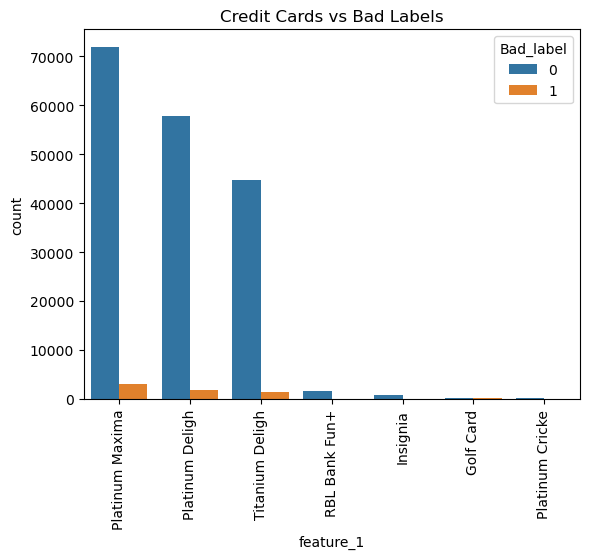

In [43]:
sns.countplot(data.feature_1,hue = data.Bad_label)  #assign countplot between feature_1 and Bad Labels
plt.title("Credit Cards vs Bad Labels") # assign title name of distributions
plt.xticks(rotation=90)#increasing font of x-axis and rorating 90 degree 
plt.show() # for showing graphs

#### Insights

* Most of the person having Platinum Maxima and Platinum Deligh Cards.
* person who has Golf Card they having 50-50 chance of good or bad Credit Score (bad or good labels).
* person who have RBL bank Fun+,Insignia and Platinum Cricke Cards they have perfect credit score

<AxesSubplot:xlabel='feature_3', ylabel='Count'>

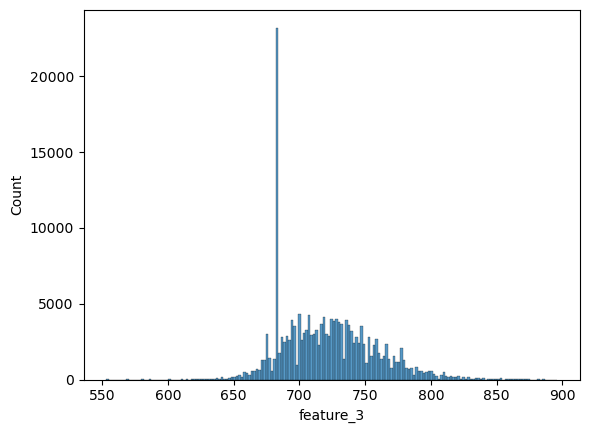

In [44]:
sns.histplot(data.feature_3)# asign histplot for feature_3

### Insights

* Most of the customers have good credit score

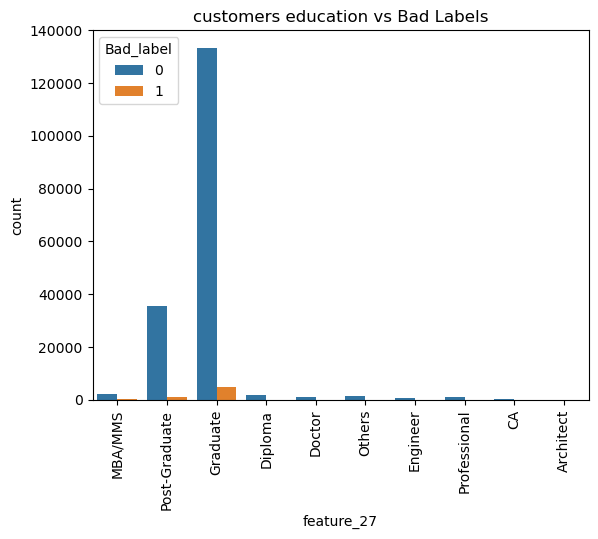

In [45]:
sns.countplot(data.feature_27,hue = data.Bad_label)#assign countplot between feature_27 and Bad Labels
plt.title("customers education vs Bad Labels")# assign title name of distributions
plt.xticks(rotation=90)#increasing font of x-axis and rorating 90 degree 
plt.show()# for showing graphs

### Insights

* Few chance of that customers who has completed Post Graduate, Graduate and MBA/MMS their Credit score are Bad.

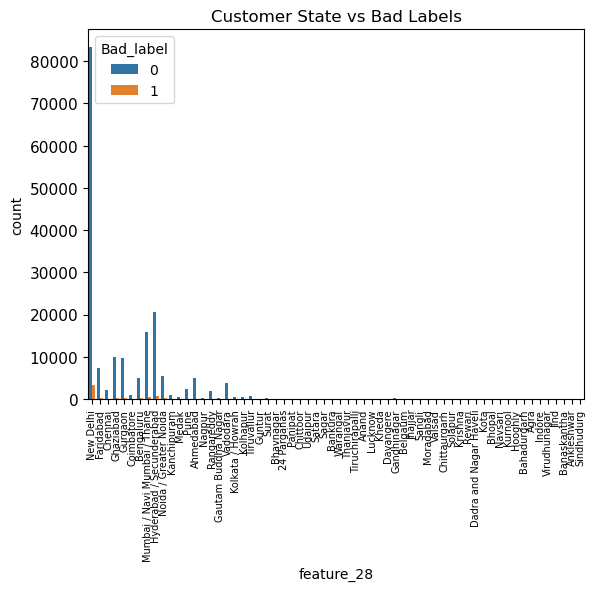

In [46]:
sns.countplot(data.feature_28,hue = data.Bad_label)#assign countplot between feature_28 and Bad Labels
plt.title("Customer State vs Bad Labels") # assign title name of distributions
plt.xticks(fontsize = 7,rotation = 90)#increasing font of x-axis and rorating 90 degree 
plt.yticks(fontsize = 11)#increasing font of y-axis
plt.show()# for showing graphs

### Insights

* Most of the Customers belong from New Delhi.

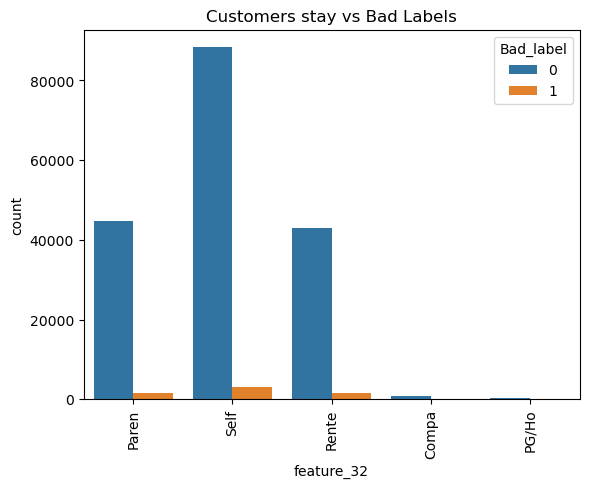

In [47]:
sns.countplot(data.feature_32,hue = data.Bad_label)#assign countplot between feature_32 and Bad Labels
plt.title("Customers stay vs Bad Labels") # assign title name of distributions
plt.xticks(rotation=90)#increasing font of x-axis and rorating 90 degree 
plt.show()# for showing graphs

### Insights

* Most of the customers who has crdit cards they stay at their own house.

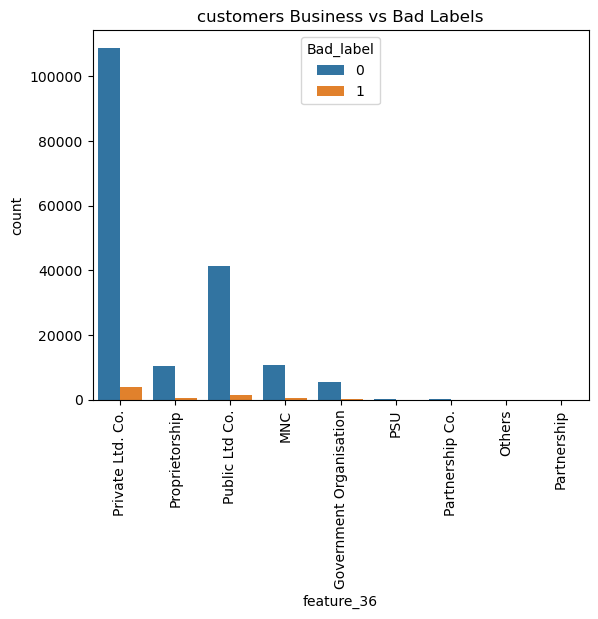

In [48]:
sns.countplot(data.feature_36,hue = data.Bad_label) #assign countplot between feature_36 and Bad Labels
plt.title("customers Business vs Bad Labels") # assign title name of distributions
plt.xticks(rotation=90)#increasing font of x-axis and rorating 90 degree 
plt.show()# for showing graphs

### Insights 


* Most of the Customer having Credit Cards who belong from Private Ltd.Co.
* Customers who started their bussiness in Partership they maintain their credit score.

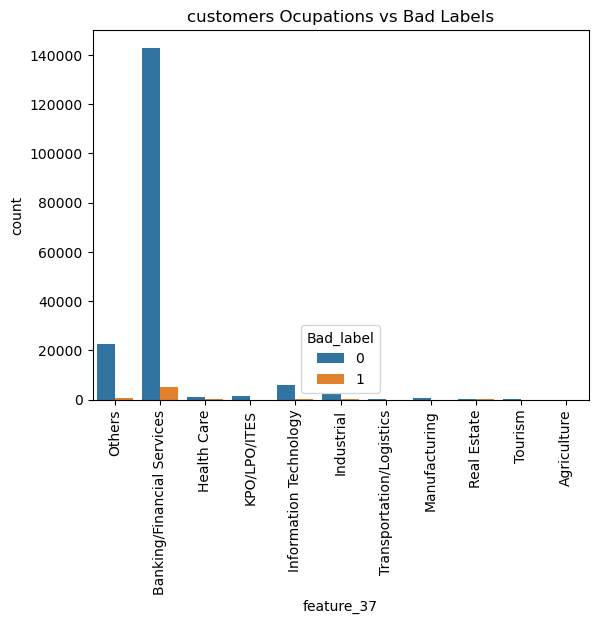

In [49]:
sns.countplot(data.feature_37,hue = data.Bad_label) #assign countplot between feature_37 and Bad Labels
plt.title("customers Ocupations vs Bad Labels") # assign title name of distributions
plt.xticks(rotation=90)#increasing font of x-axis and rorating 90 degree 
plt.show()# for showing graphs

### Insights 

* Most chance of that Customers who doing job in Banking/Financial services they taking credit cards. 

# Final Conclusions of Insights :-


* Most of the person having Platinum Maxima and Platinum Deligh Cards.
* Person who has Golf Card they having 50-50 chance of good or bad Credit Score (bad or good labels).
* Person who have RBL bank Fun+,Insignia and Platinum Cricke Cards they have perfect credit score.
* Most of the customers have good credit score.
* Few chance of that customers who has completed Post Graduate, Graduate and MBA/MMS their Credit score are Bad.
* Most of the Customers belong from New Delhi.
* Most of the Customer having Credit Cards who belong from Private Ltd.Co.
* Customers who started their bussiness in Partership they maintain their credit score.
* Most chance of that Customers who doing job in Banking/Financial services they taking credit cards.
* Most of the customers who has crdit cards they stay at their on home.

In [50]:
data

,customer_no,acct_type,high_credit_amt,cur_balance_amt,feature_1,feature_3,feature_4,feature_7,feature_12,feature_14,feature_15,feature_16,feature_26,feature_27,feature_28,feature_29,feature_30,feature_32,feature_34,feature_35,feature_36,feature_37,feature_38,feature_40,feature_41,feature_43,feature_44,feature_50,feature_56,feature_63,feature_64,feature_65,feature_66,feature_68,feature_69,feature_71,feature_72,Bad_label,opened_dt_year
0,12265,6,20900,0,Platinum Maxima,683,3,56000.0,PM1,12,SA05,MA01,0,MBA/MMS,New Delhi,110059.0,2006,Paren,1,35000.0,Private Ltd. Co.,Others,SR EXE,1,4.0,Gurgaon,4,N,10,2006,10,157,110059.0,1,35000.0,13,R,1,2013
1,12265,10,16201,10390,Platinum Maxima,683,3,56000.0,PM1,12,SA05,MA01,0,MBA/MMS,New Delhi,110059.0,2006,Paren,1,35000.0,Private Ltd. Co.,Others,SR EXE,1,4.0,Gurgaon,4,N,10,2006,10,157,110059.0,1,35000.0,13,R,1,2012
2,12265,10,41028,34420,Platinum Maxima,683,3,56000.0,PM1,12,SA05,MA01,0,MBA/MMS,New Delhi,110059.0,2006,Paren,1,35000.0,Private Ltd. Co.,Others,SR EXE,1,4.0,Gurgaon,4,N,10,2006,10,157,110059.0,1,35000.0,13,R,1,2012
3,15606,10,93473,0,Platinum Deligh,687,3,125000.0,PD1,12,SA35,S001,2,Post-Graduate,Faridabad,121003.0,2009,Self,1,100000.0,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,1,2.0,Faridabad,2,N,13,2009,13,39,121003.0,1,100000.0,13,R,1,2006
4,15606,6,20250,13500,Platinum Deligh,687,3,125000.0,PD1,12,SA35,S001,2,Post-Graduate,Faridabad,121003.0,2009,Self,1,100000.0,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,1,2.0,Faridabad,2,N,13,2009,13,39,121003.0,1,100000.0,13,R,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186324,1611,10,24228,24228,Titanium Deligh,746,3,138000.0,TD1,0,BBOL,H004,3,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995,Self,1,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0,11.0,Hyderabad,11,N,2,1995,2,14,500017.0,1,45800.0,2,R,0,2007
186325,1611,10,19584,0,Titanium Deligh,746,3,138000.0,TD1,0,BBOL,H004,3,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995,Self,1,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0,11.0,Hyderabad,11,N,2,1995,2,14,500017.0,1,45800.0,2,R,0,2007
186326,1611,10,50844,0,Titanium Deligh,746,3,138000.0,TD1,0,BBOL,H004,3,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995,Self,1,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0,11.0,Hyderabad,11,N,2,1995,2,14,500017.0,1,45800.0,2,R,0,2006
186327,1611,10,35587,0,Titanium Deligh,746,3,138000.0,TD1,0,BBOL,H004,3,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995,Self,1,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0,11.0,Hyderabad,11,N,2,1995,2,14,500017.0,1,45800.0,2,R,0,2006


#### Checking Outliers

In [51]:
# getting that columns which type are integers

df = data.select_dtypes(include='int')

In [52]:
df

,customer_no,acct_type,high_credit_amt,cur_balance_amt,feature_3,feature_4,feature_14,feature_26,feature_30,feature_34,feature_40,feature_44,feature_56,feature_63,feature_64,feature_65,feature_68,feature_71,Bad_label,opened_dt_year
0,12265,6,20900,0,683,3,12,0,2006,1,1,4,10,2006,10,157,1,13,1,2013
1,12265,10,16201,10390,683,3,12,0,2006,1,1,4,10,2006,10,157,1,13,1,2012
2,12265,10,41028,34420,683,3,12,0,2006,1,1,4,10,2006,10,157,1,13,1,2012
3,15606,10,93473,0,687,3,12,2,2009,1,1,2,13,2009,13,39,1,13,1,2006
4,15606,6,20250,13500,687,3,12,2,2009,1,1,2,13,2009,13,39,1,13,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186324,1611,10,24228,24228,746,3,0,3,1995,1,0,11,2,1995,2,14,1,2,0,2007
186325,1611,10,19584,0,746,3,0,3,1995,1,0,11,2,1995,2,14,1,2,0,2007
186326,1611,10,50844,0,746,3,0,3,1995,1,0,11,2,1995,2,14,1,2,0,2006
186327,1611,10,35587,0,746,3,0,3,1995,1,0,11,2,1995,2,14,1,2,0,2006


<AxesSubplot:xlabel='high_credit_amt'>

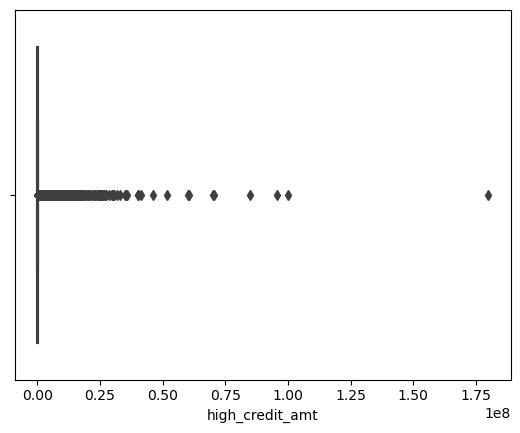

In [53]:
sns.boxplot(data.high_credit_amt)  # asign boxplot of high credit amount for checking outliers

In [54]:
# fixed outliers with Measure of central tendency

data.loc[data["high_credit_amt"]>100000000,"high_credit_amt"] = np.mean(data.high_credit_amt)

<AxesSubplot:xlabel='cur_balance_amt'>

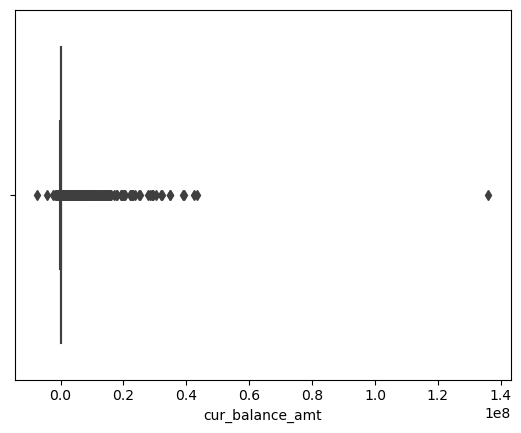

In [55]:
sns.boxplot(data.cur_balance_amt)# asign boxplot of current balance amount for checking outliers

In [56]:
# fixed outliers with Measure of central tendency
data.loc[data["cur_balance_amt"]>130000000,"cur_balance_amt"] = np.mean(data.cur_balance_amt)

# Conversion of categorical variables

* Here i'm going to apply LabelEncoder and manually Encoding because every data are Nominal Data.

#### Feature_1

* which showing cards types

In [57]:
data.feature_1.value_counts()

Platinum Maxima    74978
Platinum Deligh    59682
Titanium Deligh    46016
RBL Bank Fun+       1644
Insignia             865
Golf Card            403
Platinum Cricke      303
Name: feature_1, dtype: int64

In [58]:
#manual encoding of Total stops
data.feature_1 = data.feature_1.replace({"Platinum Cricke":0,"Golf Card":1,"Insignia":2,"RBL Bank Fun+":3,"Titanium Deligh":4,
                                        "Platinum Deligh":5,"Platinum Maxima":6})

#### Feature_27

In [59]:
data.feature_27.value_counts()

Graduate         138359
Post-Graduate     36573
MBA/MMS            2325
Diploma            1837
Others             1501
Doctor             1242
Professional       1070
Engineer            621
CA                  339
Architect            24
Name: feature_27, dtype: int64

In [60]:
#manual encoding of feature_27

data.feature_27 = data.feature_27.replace({"Architect":0,"CA":1,"Engineer":2,"Professional":3,"Doctor":4,"Others":5,
                                           "Diploma":6,"MBA/MMS":7,"Post-Graduate":8,"Graduate":9})

#### Feature_32

In [61]:
data.feature_32.value_counts()

Self     91398
Paren    46436
Rente    44698
Compa     1044
PG/Ho      315
Name: feature_32, dtype: int64

In [62]:
# #manual encoding of feature_32
data.feature_32 = data.feature_32.replace({"PG/Ho":0,"Compa":1,"Rente":2,"Paren":3,"Self":4})

#### Feature_36

In [63]:
data.feature_36.value_counts()

Private Ltd. Co.           112743
Public Ltd Co.              42735
MNC                         11136
Proprietorship              11018
Government Organisation      5846
Partnership Co.               178
PSU                           176
Partnership                    54
Others                          5
Name: feature_36, dtype: int64

In [64]:
# feature_36
data.feature_36 = data.feature_36.replace({"Others":0,"Partnership":1,"PSU":2,"Partnership Co.":3,"Government Organisation":4,
                                          "Proprietorship":5,"MNC":6,"Public Ltd Co.":7,"Private Ltd. Co.":8})

#### Feature_37

In [65]:
data.feature_37.value_counts()

Banking/Financial Services    148232
Others                         23390
Information Technology          6013
Industrial                      2147
KPO/LPO/ITES                    1513
Health Care                     1209
Manufacturing                    522
Transportation/Logistics         408
Real Estate                      258
Tourism                          185
Agriculture                       14
Name: feature_37, dtype: int64

In [66]:
# #manual encoding of feature 37
data.feature_37 = data.feature_37.replace({"Agriculture":0,"Tourism":1,"Real Estate":2,"Transportation/Logistics":3,"Manufacturing":4,
                                          "Health Care":5,"KPO/LPO/ITES":6,"Industrial":7,"Information Technology":8,"Others":9,
                                          "Banking/Financial Services":10})

#### Feature_72

In [67]:
data.feature_72.value_counts()

R    128537
O     55354
Name: feature_72, dtype: int64

In [68]:
# #manual encoding of feature 72
data.feature_72 = data.feature_72.replace({"O":0,"R":1})

#### Feature_12

In [69]:
data.feature_12.value_counts()

PM1    73144
PD1    59531
TD1    45674
PM2     1815
PB1     1587
IS1      741
GO1      403
TD2      343
DD1      279
PD2      150
IS2      124
PB2       57
DD2       24
PM3       16
PM4        2
PD3        1
Name: feature_12, dtype: int64

#### Feature_50

In [70]:
data.feature_50.value_counts()

Y    102546
N     81345
Name: feature_50, dtype: int64

In [71]:
#manual encoding of feature 50

data.feature_50 = data.feature_50.replace({"N":0,"Y":1})

In [72]:
from sklearn.preprocessing import LabelEncoder  # assign label encoder for change categorical value into numerical
le = LabelEncoder()

In [73]:
data.feature_12 = le.fit_transform(data.feature_12)

In [74]:
data.feature_15 = le.fit_transform(data.feature_15)

In [75]:
data.feature_16 = le.fit_transform(data.feature_16)

In [76]:
data.feature_28 = le.fit_transform(data.feature_28)

In [77]:
data.feature_38 = le.fit_transform(data.feature_38)

In [78]:
data.feature_50.value_counts()

1    102546
0     81345
Name: feature_50, dtype: int64

In [79]:
data

,customer_no,acct_type,high_credit_amt,cur_balance_amt,feature_1,feature_3,feature_4,feature_7,feature_12,feature_14,feature_15,feature_16,feature_26,feature_27,feature_28,feature_29,feature_30,feature_32,feature_34,feature_35,feature_36,feature_37,feature_38,feature_40,feature_41,feature_43,feature_44,feature_50,feature_56,feature_63,feature_64,feature_65,feature_66,feature_68,feature_69,feature_71,feature_72,Bad_label,opened_dt_year
0,12265,6,20900.0,0.0,6,683,3,56000.0,10,12,303,360,0,7,42,110059.0,2006,3,1,35000.0,8,9,4509,1,4.0,Gurgaon,4,0,10,2006,10,157,110059.0,1,35000.0,13,1,1,2013
1,12265,10,16201.0,10390.0,6,683,3,56000.0,10,12,303,360,0,7,42,110059.0,2006,3,1,35000.0,8,9,4509,1,4.0,Gurgaon,4,0,10,2006,10,157,110059.0,1,35000.0,13,1,1,2012
2,12265,10,41028.0,34420.0,6,683,3,56000.0,10,12,303,360,0,7,42,110059.0,2006,3,1,35000.0,8,9,4509,1,4.0,Gurgaon,4,0,10,2006,10,157,110059.0,1,35000.0,13,1,1,2012
3,15606,10,93473.0,0.0,5,687,3,125000.0,7,12,322,427,2,8,18,121003.0,2009,4,1,100000.0,8,10,2019,1,2.0,Faridabad,2,0,13,2009,13,39,121003.0,1,100000.0,13,1,1,2006
4,15606,6,20250.0,13500.0,5,687,3,125000.0,7,12,322,427,2,8,18,121003.0,2009,4,1,100000.0,8,10,2019,1,2.0,Faridabad,2,0,13,2009,13,39,121003.0,1,100000.0,13,1,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186324,1611,10,24228.0,24228.0,4,746,3,138000.0,14,0,119,287,3,8,25,500017.0,1995,4,1,45800.0,8,10,2629,0,11.0,Hyderabad,11,0,2,1995,2,14,500017.0,1,45800.0,2,1,0,2007
186325,1611,10,19584.0,0.0,4,746,3,138000.0,14,0,119,287,3,8,25,500017.0,1995,4,1,45800.0,8,10,2629,0,11.0,Hyderabad,11,0,2,1995,2,14,500017.0,1,45800.0,2,1,0,2007
186326,1611,10,50844.0,0.0,4,746,3,138000.0,14,0,119,287,3,8,25,500017.0,1995,4,1,45800.0,8,10,2629,0,11.0,Hyderabad,11,0,2,1995,2,14,500017.0,1,45800.0,2,1,0,2006
186327,1611,10,35587.0,0.0,4,746,3,138000.0,14,0,119,287,3,8,25,500017.0,1995,4,1,45800.0,8,10,2629,0,11.0,Hyderabad,11,0,2,1995,2,14,500017.0,1,45800.0,2,1,0,2006


In [80]:
# i'm going to drop feature_43 variable because feature_28 and feature_43 are giving us same information.

data.drop("feature_43",axis=1,inplace=True)

# Feature Selection

In [81]:
data.corr()  # checking corelation

,customer_no,acct_type,high_credit_amt,cur_balance_amt,feature_1,feature_3,feature_4,feature_7,feature_12,feature_14,feature_15,feature_16,feature_26,feature_27,feature_28,feature_29,feature_30,feature_32,feature_34,feature_35,feature_36,feature_37,feature_38,feature_40,feature_41,feature_44,feature_50,feature_56,feature_63,feature_64,feature_65,feature_66,feature_68,feature_69,feature_71,feature_72,Bad_label,opened_dt_year
customer_no,1.000000,0.002620,-0.012981,-0.004717,0.294667,0.025044,-0.214869,-0.020007,-0.836574,0.384075,0.195424,-0.060657,-0.306869,0.016232,0.091399,-0.227594,-0.035481,-0.034164,0.003752,-0.062705,-0.041673,-0.056465,-0.004650,-0.010859,-0.027864,-0.027864,-0.090895,0.042654,-0.035481,0.056193,0.053702,-0.162787,0.003349,-0.062713,0.061212,-0.024418,-0.007948,0.030459
acct_type,0.002620,1.000000,-0.077414,-0.096352,-0.005649,-0.033725,0.006518,-0.003797,0.000861,-0.001586,-0.007305,0.000859,-0.010376,0.001733,-0.008561,0.011519,-0.009029,-0.008611,0.025704,-0.004564,0.022901,-0.002679,-0.002086,-0.011411,-0.034768,-0.034768,0.041353,0.001359,-0.009029,0.003247,0.004171,0.013652,0.025738,-0.004564,0.006804,-0.005496,-0.005122,-0.048139
high_credit_amt,-0.012981,-0.077414,1.000000,0.687896,-0.014475,0.056716,-0.002310,0.036154,-0.022938,-0.023295,-0.025493,-0.011548,0.011698,-0.019718,-0.009347,0.003996,-0.008974,0.032985,0.051782,0.029372,0.016770,0.008820,-0.003916,-0.027715,-0.027824,-0.027824,-0.012968,0.031364,-0.008974,0.021980,-0.019296,-0.007187,0.051838,0.029373,0.023286,0.001696,0.011339,0.027138
cur_balance_amt,-0.004717,-0.096352,0.687896,1.000000,-0.005116,0.040225,-0.001379,0.007984,-0.014474,-0.015166,-0.010696,-0.006700,0.003498,-0.011980,-0.008134,0.001189,0.006659,0.019721,0.028858,0.018662,0.009722,0.005539,-0.001999,-0.012745,-0.017508,-0.017508,-0.014429,0.026141,0.006659,0.019776,-0.010926,-0.005321,0.028936,0.018663,0.021132,0.000390,0.004049,0.081156
feature_1,0.294667,-0.005649,-0.014475,-0.005116,1.000000,-0.012258,-0.042030,-0.038656,-0.261069,0.372548,0.013350,0.043843,-0.112638,-0.006507,0.003601,0.013878,0.002966,-0.020809,0.060584,0.009002,0.006041,-0.002325,0.005415,-0.024820,-0.045752,-0.045752,0.003376,-0.002812,0.002966,-0.002946,0.008396,0.008935,0.059146,0.008974,-0.012313,-0.003023,0.008832,0.032332
feature_3,0.025044,-0.033725,0.056716,0.040225,-0.012258,1.000000,-0.203041,0.340509,-0.028536,0.023719,0.037882,-0.074658,0.035229,-0.009809,0.017947,-0.061619,-0.075684,0.122907,0.124679,0.055915,0.024557,0.030380,-0.021913,-0.104955,-0.021252,-0.021252,0.000395,0.067023,-0.075684,0.041513,-0.072618,-0.100618,0.126353,0.055944,0.042241,0.049978,-0.048263,-0.247929
feature_4,-0.214869,0.006518,-0.002310,-0.001379,-0.042030,-0.203041,1.000000,-0.066348,0.115123,0.094484,0.153794,-0.159523,0.217240,-0.070308,0.025362,-0.155481,0.028354,0.056615,-0.063019,0.015744,0.006178,0.046598,0.008872,-0.005718,0.035795,0.035795,0.105354,0.019518,0.028354,0.043110,0.083335,-0.097910,-0.064193,0.015724,0.036571,-0.028937,0.012696,0.012168
feature_7,-0.020007,-0.003797,0.036154,0.007984,-0.038656,0.340509,-0.066348,1.000000,-0.075191,-0.020288,-0.055413,-0.053703,0.079718,-0.002243,-0.023503,0.010429,-0.060146,0.095415,0.088941,0.095608,0.038779,0.029794,0.006308,-0.067519,0.007407,0.007407,0.214929,0.045331,-0.060146,0.028304,-0.054489,-0.020599,0.089005,0.095608,0.025879,0.041011,-0.059830,-0.238501
feature_12,-0.836574,0.000861,-0.022938,-0.014474,-0.261069,-0.028536,0.115123,-0.075191,1.000000,-0.420164,-0.140428,0.092972,0.127253,-0.002222,-0.089538,0.220102,0.055754,-0.045446,-0.048859,0.031656,0.016937,0.004347,0.008113,0.059697,0.054482,0.054482,0.051504,-0.073320,0.055754,-0.084714,-0.032892,0.162648,-0.048931,0.031655,-0.089368,0.023258,-0.012057,0.031235
feature_14,0.384075,-0.001586,-0.023295,-0.015166,0.372548,0.023719,0.094484,-0.020288,-0.420164,1.000000,0.370356,-0.172837,-0.004556,0.062858,0.110203,-0.414507,-0.043192,0.056884,0.012143,-0.065598,0.006216,0.017217,-0.00

<AxesSubplot:>

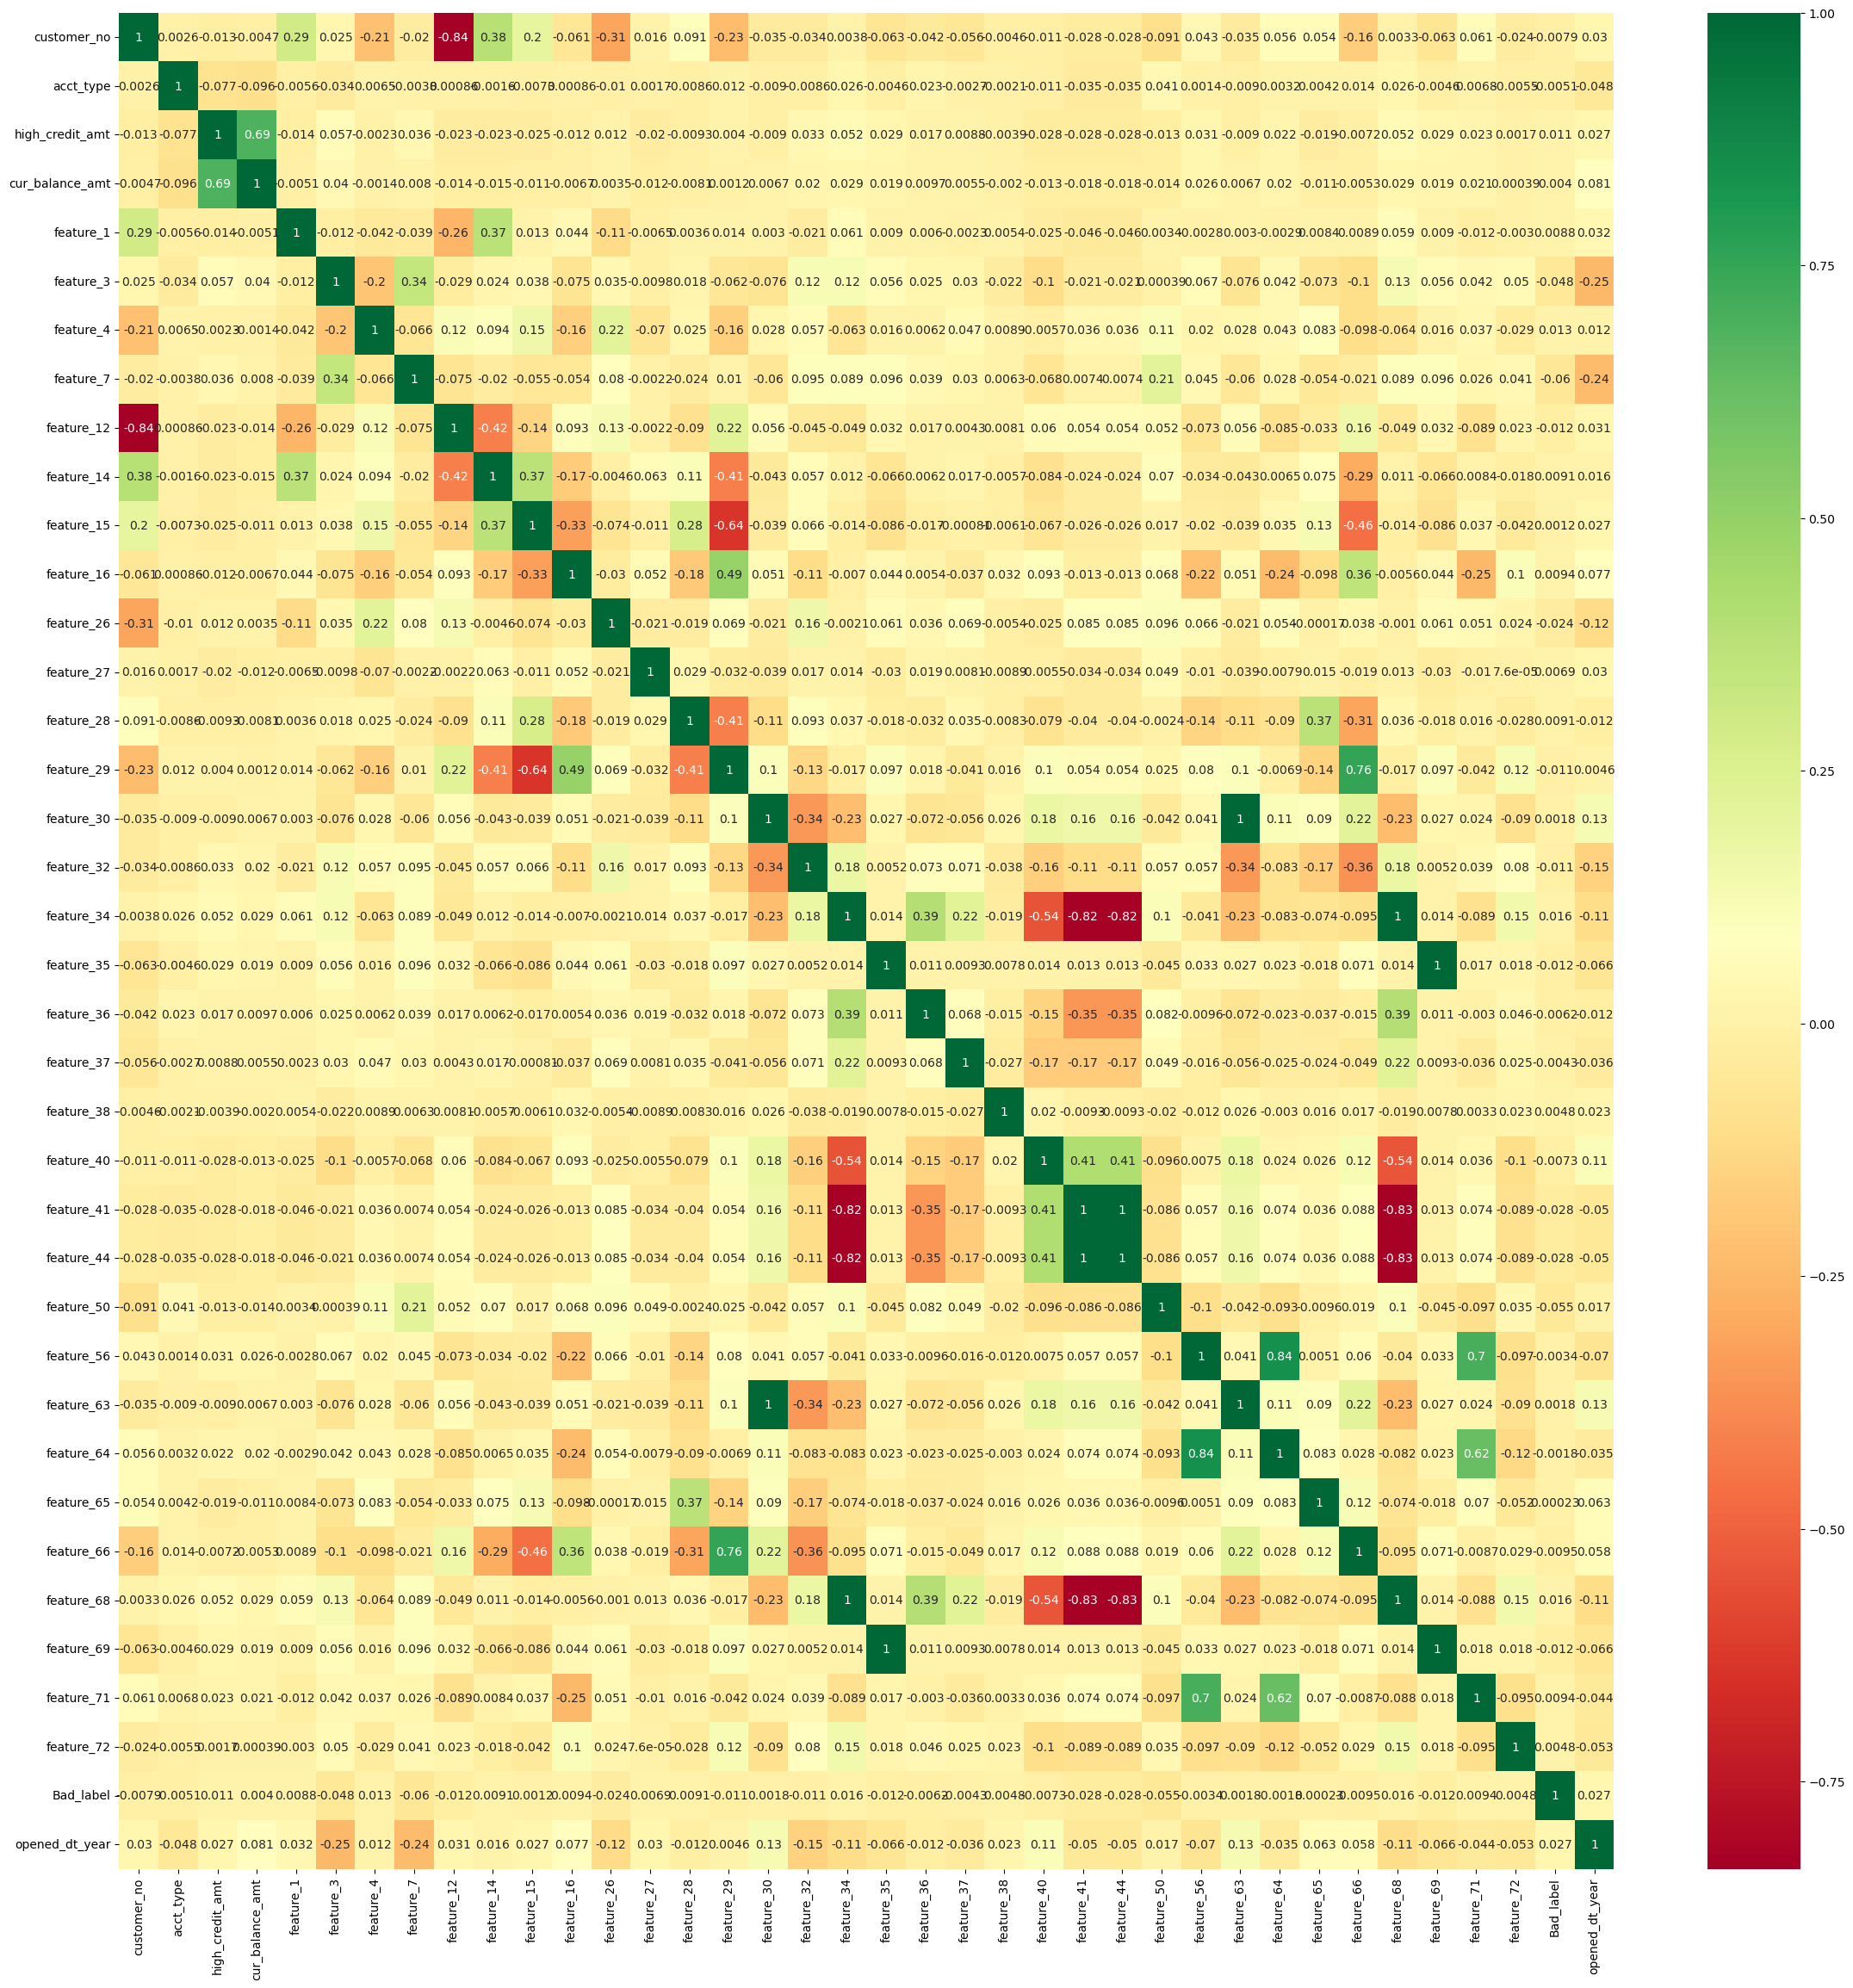

In [82]:
plt.figure(figsize=(28,28))#increase plot size
sns.heatmap(data.corr(),annot=True,cmap="RdYlGn")#its show corelation between each and every columns by plot heatmap
#here we can see that every columns are connected to each other,So we can't remove any columns.

* Here, we can see that feature_30 highly corelated with feature_63
* feature_34 highly corelated with feature_68
* feature_35 highly corelated with feature_69
* feature_41 highly corelated with feature_44
* So, according to statistical way i'm going to drop one feature of them.

In [83]:
data.drop(["feature_63","feature_68","feature_69","feature_41"],axis=1,inplace=True) # droping columns

In [84]:
# Now selecting independent variable and dependent variables

x = data.drop("Bad_label",axis=1)
x

,customer_no,acct_type,high_credit_amt,cur_balance_amt,feature_1,feature_3,feature_4,feature_7,feature_12,feature_14,feature_15,feature_16,feature_26,feature_27,feature_28,feature_29,feature_30,feature_32,feature_34,feature_35,feature_36,feature_37,feature_38,feature_40,feature_44,feature_50,feature_56,feature_64,feature_65,feature_66,feature_71,feature_72,opened_dt_year
0,12265,6,20900.0,0.0,6,683,3,56000.0,10,12,303,360,0,7,42,110059.0,2006,3,1,35000.0,8,9,4509,1,4,0,10,10,157,110059.0,13,1,2013
1,12265,10,16201.0,10390.0,6,683,3,56000.0,10,12,303,360,0,7,42,110059.0,2006,3,1,35000.0,8,9,4509,1,4,0,10,10,157,110059.0,13,1,2012
2,12265,10,41028.0,34420.0,6,683,3,56000.0,10,12,303,360,0,7,42,110059.0,2006,3,1,35000.0,8,9,4509,1,4,0,10,10,157,110059.0,13,1,2012
3,15606,10,93473.0,0.0,5,687,3,125000.0,7,12,322,427,2,8,18,121003.0,2009,4,1,100000.0,8,10,2019,1,2,0,13,13,39,121003.0,13,1,2006
4,15606,6,20250.0,13500.0,5,687,3,125000.0,7,12,322,427,2,8,18,121003.0,2009,4,1,100000.0,8,10,2019,1,2,0,13,13,39,121003.0,13,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186324,1611,10,24228.0,24228.0,4,746,3,138000.0,14,0,119,287,3,8,25,500017.0,1995,4,1,45800.0,8,10,2629,0,11,0,2,2,14,500017.0,2,1,2007
186325,1611,10,19584.0,0.0,4,746,3,138000.0,14,0,119,287,3,8,25,500017.0,1995,4,1,45800.0,8,10,2629,0,11,0,2,2,14,500017.0,2,1,2007
186326,1611,10,50844.0,0.0,4,746,3,138000.0,14,0,119,287,3,8,25,500017.0,1995,4,1,45800.0,8,10,2629,0,11,0,2,2,14,500017.0,2,1,2006
186327,1611,10,35587.0,0.0,4,746,3,138000.0,14,0,119,287,3,8,25,500017.0,1995,4,1,45800.0,8,10,2629,0,11,0,2,2,14,500017.0,2,1,2006


In [85]:
y = data.Bad_label
y

0         1
1         1
2         1
3         1
4         1
         ..
186324    0
186325    0
186326    0
186327    0
186328    0
Name: Bad_label, Length: 183891, dtype: int64

In [86]:
#target variable are not balanced so we have to balanced this for avoiding overfitting and underfitting
data.Bad_label.value_counts()

0    177411
1      6480
Name: Bad_label, dtype: int64

# Model Creation :-

In [87]:
from sklearn.model_selection import train_test_split  # import train test split for spliting the data
# creating x_train,x_test,y_train,y_test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=43) 

In [88]:
x_train

,customer_no,acct_type,high_credit_amt,cur_balance_amt,feature_1,feature_3,feature_4,feature_7,feature_12,feature_14,feature_15,feature_16,feature_26,feature_27,feature_28,feature_29,feature_30,feature_32,feature_34,feature_35,feature_36,feature_37,feature_38,feature_40,feature_44,feature_50,feature_56,feature_64,feature_65,feature_66,feature_71,feature_72,opened_dt_year
94442,8814,7,142500.0,0.0,6,688,3,50000.0,10,0,354,171,2,8,12,600004.0,2005,3,1,50000.0,7,7,2740,3,11,1,31,31,13,600004.0,31,1,2011
99901,17838,6,33500.0,0.0,5,701,3,102000.0,7,12,301,133,0,8,42,110062.0,1990,4,1,40000.0,7,10,1756,7,10,1,10,10,157,110062.0,10,0,2012
166664,6173,10,113000.0,62777.0,6,698,3,102000.0,10,12,218,297,2,8,39,400104.0,1997,4,2,450000.0,8,10,2629,0,0,1,21,21,15,400104.0,21,1,2011
56672,18594,10,202.0,0.0,5,682,2,66000.0,7,12,319,404,0,9,23,122001.0,1998,3,1,37301.0,7,10,2699,1,11,0,13,13,3,122001.0,10,1,2007
39390,14714,5,182500.0,82924.0,6,712,1,180000.0,10,12,331,136,0,9,42,110027.0,1989,4,1,40000.0,6,10,5457,1,7,1,10,10,157,110027.0,13,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130612,11535,5,75000.0,0.0,6,676,1,85000.0,10,12,164,173,2,3,12,600083.0,2000,4,2,52000.0,8,10,2629,0,0,1,31,31,13,600083.0,31,0,2010
126694,12217,0,440000.0,149709.0,6,780,1,150000.0,11,0,35,347,3,9,39,400092.0,2005,4,1,92256.0,7,10,841,6,11,0,21,21,15,400092.0,21,1,2011
41151,5332,1,450000.0,119491.0,4,701,3,156000.0,14,0,218,297,0,4,39,410210.0,2009,3,1,40000.0,8,10,1549,4,11,1,21,21,1586,410210.0,21,1,2011
152766,10267,10,44042.0,0.0,6,682,2,84000.0,10,12,301,134,0,9,23,122001.0,2012,2,1,33251.0,5,10,1177,4,11,0,13,5,721,847424.0,13,0,2013


In [89]:
y_train

94442     0
99901     0
166664    0
56672     0
39390     0
         ..
130612    0
126694    0
41151     0
152766    0
14259     0
Name: Bad_label, Length: 137918, dtype: int64

In [90]:
x_test

,customer_no,acct_type,high_credit_amt,cur_balance_amt,feature_1,feature_3,feature_4,feature_7,feature_12,feature_14,feature_15,feature_16,feature_26,feature_27,feature_28,feature_29,feature_30,feature_32,feature_34,feature_35,feature_36,feature_37,feature_38,feature_40,feature_44,feature_50,feature_56,feature_64,feature_65,feature_66,feature_71,feature_72,opened_dt_year
168799,1437,10,175672.0,0.0,4,779,3,114000.0,14,12,301,130,2,9,21,201001.0,2011,2,1,45370.0,8,10,4497,9,8,0,33,33,83,247554.0,10,1,2014
77082,3750,6,8000.0,0.0,4,730,3,150000.0,14,0,261,202,3,3,42,110075.0,2000,2,1,140079.0,7,10,4653,1,11,0,10,10,157,110075.0,13,1,2008
35388,6272,13,44000.0,0.0,6,709,1,138000.0,10,0,135,200,1,9,42,110095.0,2008,2,1,1.0,8,10,1989,1,11,1,10,10,157,110095.0,10,1,2009
112792,11300,10,26574.0,0.0,6,727,1,234000.0,10,12,188,61,0,9,25,500003.0,1971,4,1,50000.0,7,9,2629,3,11,1,2,2,14,500003.0,2,1,2007
97882,4587,6,16200.0,4050.0,4,710,3,101000.0,14,0,324,205,0,9,42,110058.0,2014,2,1,65000.0,7,10,3678,4,8,0,10,10,157,110058.0,10,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98811,2011,10,224.0,-76.0,4,663,3,85000.0,14,12,301,134,1,8,42,110018.0,2011,4,1,1.0,8,10,632,2,11,1,10,10,157,110018.0,10,0,2014
21543,2779,1,81559.0,0.0,4,745,3,41000.0,14,12,301,124,3,8,42,110059.0,1995,4,1,26751.0,4,10,2479,0,11,0,10,10,157,110059.0,10,1,2013
115233,22928,10,16499.0,3520.0,5,682,2,68000.0,7,12,301,140,0,9,42,110092.0,2009,3,1,37544.0,8,10,2863,1,6,0,10,33,465,221712.0,13,0,2013
7767,13264,10,48773.0,14002.0,6,706,1,102000.0,10,12,190,509,0,9,25,500018.0,1983,3,1,28500.0,8,9,4746,1,5,1,2,2,14,500018.0,2,1,2014


In [91]:
y_test

168799    0
77082     0
35388     0
112792    0
97882     0
         ..
98811     0
21543     0
115233    0
7767      0
162232    0
Name: Bad_label, Length: 45973, dtype: int64

# Data Balancing

In [92]:
from imblearn.over_sampling import SMOTE  # assign SMOTE for handling unbalanced data
sm = SMOTE()

In [93]:
x_sm,y_sm = sm.fit_resample(x_train,y_train)  # balancing data 

In [94]:
from collections import Counter  # checking data balanced or not
print(Counter(y_train))
print(Counter(y_sm))

Counter({0: 133054, 1: 4864})
Counter({0: 133054, 1: 133054})


# Model Selection

## LogisticRegression Model

In [95]:
from sklearn.linear_model import LogisticRegression  # assign Logistic regression
lr = LogisticRegression()
lr.fit(x_sm,y_sm) # fit the model

LogisticRegression()

## DecisionTreeClassifier

In [96]:
from sklearn.tree import DecisionTreeClassifier   # assign decision tree classifier algorithmn
dt = DecisionTreeClassifier()                    
dt.fit(x_sm,y_sm)   # fit the model

DecisionTreeClassifier()

## RandomForestClassifier

In [97]:
from sklearn.ensemble import RandomForestClassifier#importing randomforest
rf_clf = RandomForestClassifier(n_estimators=100)#object creation ,taking 100 decision tree in random forest 
rf_clf.fit(x_sm,y_sm)#training the data

RandomForestClassifier()

## XGBClassifier

In [98]:
import xgboost as xg    #importing xgboost with alias name xg
from xgboost import XGBClassifier   #calling XGBRegressor
xgb_r = xg.XGBClassifier(    #assign in variable
                  n_estimators = 500, seed = 123)
xgb_r.fit(x_sm, y_sm)# Fitting the model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

## MLPClassifier -ANN

In [99]:
## model creation
from sklearn.neural_network import MLPClassifier
model = MLPClassifier( hidden_layer_sizes=(100,50,2),
                       learning_rate_init=0.0001,
                       max_iter=150,random_state=78) ## model object creation max_iter=Stopping parameter
model.fit(x_sm,y_sm) ## training the data

MLPClassifier(hidden_layer_sizes=(100, 50, 2), learning_rate_init=0.0001,
              max_iter=150, random_state=78)

## Model Evalution

In [100]:
# assign evalution metrics for checking performance of model

from sklearn.metrics import auc, accuracy_score,roc_curve,roc_auc_score,r2_score,f1_score,precision_score,recall_score,confusion_matrix,classification_report

## Logistic Regression Model Evalution

In [101]:
y_pred = lr.predict(x_test) # predict the model
y_pred

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [102]:
y_test.values # checking test values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [103]:
acc = accuracy_score(y_pred,y_test) # checking accuracy score
acc

0.5037086985839514

In [104]:
roc_auc_score(y_pred,y_test)

0.512884705011338

In [105]:
f1 = f1_score(y_pred,y_test,average="weighted") # checking f1 score
f1

0.36853335679364835

In [106]:
confusion_matrix(y_pred,y_test) # checking confusion metrix

array([[22037,   496],
       [22320,  1120]], dtype=int64)

In [107]:
print(classification_report(y_pred,y_test)) # checking classification report of model

              precision    recall  f1-score   support

           0       0.50      0.98      0.66     22533
           1       0.69      0.05      0.09     23440

    accuracy                           0.50     45973
   macro avg       0.59      0.51      0.37     45973
weighted avg       0.60      0.50      0.37     45973



## Decision Tree Classifier Model Evalution

In [108]:
y_pred4=dt.predict(x_test) # predict the model
y_pred4

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [109]:
y_test.values # checking y test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [110]:
acc5 = accuracy_score(y_pred4,y_test) # checking accuracy score
f1_2 = f1_score(y_pred4,y_test)
print("accuracy_score :", accuracy_score(y_pred4,y_test))
print("precision_score :", precision_score(y_pred4,y_test))
print("recall_score :", recall_score(y_pred4,y_test))
print("F1_score :", f1_score(y_pred4,y_test))

accuracy_score : 0.9863180562504078
precision_score : 0.9189356435643564
recall_score : 0.7488653555219364
F1_score : 0.8252292303417614


In [111]:
print(classification_report(y_pred4,y_test)) # checking classification report for model performance

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     43990
           1       0.92      0.75      0.83      1983

    accuracy                           0.99     45973
   macro avg       0.95      0.87      0.91     45973
weighted avg       0.99      0.99      0.99     45973



## RandomForest Classifier Model Evalution

In [112]:
y_predict=rf_clf.predict(x_test)#testing

In [113]:
acc4 = accuracy_score(y_test,y_predict)# checking accuracy
f1_3 = f1_score(y_test,y_predict)
print("accuracy_score :", accuracy_score(y_test,y_predict))
print("precision_score :", precision_score(y_test,y_predict))
print("recall_score :", recall_score(y_test,y_predict))
print("F1_score :", f1_score(y_test,y_predict))

accuracy_score : 0.9954973571444109
precision_score : 0.986869384934347
recall_score : 0.8836633663366337
F1_score : 0.9324191968658179


In [114]:
print(classification_report(y_test,y_predict))# checking classification report for model performance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44357
           1       0.99      0.88      0.93      1616

    accuracy                           1.00     45973
   macro avg       0.99      0.94      0.97     45973
weighted avg       1.00      1.00      1.00     45973



## XGBoost Classifier Model Evalution

In [115]:
xgb_pred = xgb_r.predict(x_test)# Predict the model

acc_score4 = accuracy_score(y_test,xgb_pred)  #checking r2 score
f1_4 = f1_score(y_test,xgb_pred)

In [116]:
roc_auc_score(y_test,xgb_pred)

0.9634111937638293

In [117]:
print("accuracy_score :", accuracy_score(y_test,xgb_pred))
print("precision_score :", precision_score(y_test,xgb_pred))
print("recall_score :", recall_score(y_test,xgb_pred))
print("F1_score :", f1_score(y_test,xgb_pred))

accuracy_score : 0.997281012768364
precision_score : 0.9953488372093023
recall_score : 0.926980198019802
F1_score : 0.9599487343800063


In [118]:
print(classification_report(y_test,xgb_pred))# checking classification report for model performance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44357
           1       1.00      0.93      0.96      1616

    accuracy                           1.00     45973
   macro avg       1.00      0.96      0.98     45973
weighted avg       1.00      1.00      1.00     45973



In [119]:
confusion_matrix(y_test,xgb_pred)

array([[44350,     7],
       [  118,  1498]], dtype=int64)

# ANN - MLPClassifier Model Evalution

In [120]:
y_predict_proba = model.predict(x_test) ## predicting the probability of class
y_train_predict = model.predict(x_train) # predicting the train data

In [121]:
y_predict_proba = model.predict(x_test)
acc4 = accuracy_score(y_test,y_predict_proba)# checking accuracy score
f1_5 = f1_score(y_test,y_predict_proba)
acc4

0.9648489330694103

In [122]:
print(classification_report(y_test,y_predict_proba))# checking classification report for model performance

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     44357
           1       0.00      0.00      0.00      1616

    accuracy                           0.96     45973
   macro avg       0.48      0.50      0.49     45973
weighted avg       0.93      0.96      0.95     45973



# Model Comparsion Report

In [123]:
# creating model comparison report using DataFrame
score = pd.DataFrame({"Model":["LogisticRegression","DecisionTreeClassifier","RandomForestClassifier","XGBoost Classifier","ANN_MLPClassifier"],
                     "Accuracy":[acc*100,acc5*100,acc4*100,acc_score4*100,acc4*100],
                     "f1_score":[f1,f1_2,f1_3,f1_4,f1_5]})

In [124]:
score# showing model comparison report 

,Model,Accuracy,f1_score
0,LogisticRegression,50.370870,0.368533
1,DecisionTreeClassifier,98.631806,0.825229
2,RandomForestClassifier,96.484893,0.932419
3,XGBoost Classifier,99.728101,0.959949
4,ANN_MLPClassifier,96.484893,0.000000


# Conclusion of Model Comparison Report

I have used 5 Algorithmns which name are LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,XG Boost and ANN_MLPClassifier for training the model. I got __99.73__ percentage in __XGBoost Classifier__ which are maximum than all Algorithmn and its working Mindblowing and model predict perfect result. So,I am perfering XGBoost Classifier for checking the __GoodCredit Score of customers__.

# Data Analysis Report 

The project is a machine learning model to classify Bank GoodCredit Score. The dataset contained 3 tables of Bank      GoodCredit Score which are Customers Enquiry,customers Demographics and Customers Account. The project was divided into several steps, including data exploration, data preprocessing, building and training machine learning models, and evaluating model performance.

During data exploration, we analyzed the dataset to get a better understanding of the data. We observed that the dataset was not balanced,target labels was unbalanced. We also noticed that this dataset contains lots of null value and we have to fill and drop columns which has more than 40% null value,Even most columns had wrong datatype So,we need to fixed that columns and change categorical columns into numerical for training.

For data preprocessing, We have filled null and droped that columns which has more than 40% missing value. We also droped that columns which has no variaty in values for reduced overfitting and underfitting of model.we also fixed wrong datatypes of columns and we used LabelsEncoders and manually Encoding for change categorical variables into numerical variables.Even we droped unnecessary variables.

We built machine learning models by applying LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,XG Boost and ANN_MLPClassifier for training the model . We trained these models on the original datasets and evaluated their performance using accuracy, recall score, precision score and F1 score. We also more focused on recall and precision score getting best model.

# Report on Challenges faced

* __Huge amount of data__ : this dataset contains 3 tables after merging important tables rows goes to 1.9 lakhs and         columns goes to 105 which are huge because of this we faced more problem while doing work it was take more time for run     any cells.

* __Choosing columns for training model__ : this dataset has 105 columns and most of the columns having no variety in their   values it was difficult to select important columns.

* __hiding columns names__ : this dataset has customers demographices tables which columns name are hiding for security       purpose.it was difficult to understand what columns are saying because of this it was difficult to select important         columns.

* __No EDA__ : we can't do EDA in this dataset because 80% columns names are hide for security purposes and it's difficult   to get insights from data.because of this we got problem while doing EDA.

                                              __DONE__